<a href="https://colab.research.google.com/github/wahyuvlntn/Brazillian-E-Commerce-Data-Analysis/blob/main/Proyek_Analisis_Data_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Wahyu Valentino Marasitua
- **Email:** wahyuvalentino54@gmail.com
- **ID Dicoding:** wahyu_valentino

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara lokasi geografis pelanggan dan rating ulasan yang diberikan? Apakah pelanggan dari wilayah tertentu cenderung memberikan ulasan lebih positif atau negatif?
- Bagaimana performa penjualan untuk setiap kategori produk? Kategori mana yang paling populer dan memberikan kontribusi terbesar terhadap pendapatan?
- Apakah ada korelasi antara harga produk dan rating ulasan yang diberikan? Apakah produk yang lebih mahal cenderung mendapatkan ulasan yang lebih baik?
- Apakah metode pembayaran bervariasi berdasarkan wilayah geografis pelanggan? Apakah pelanggan dari daerah tertentu lebih sering memilih pembayaran dengan kartu kredit, transfer bank, atau metode lain?
- Apakah penjual dari wilayah tertentu memiliki kinerja pengiriman yang lebih baik dibandingkan dengan penjual dari wilayah lain? Misalnya, apakah penjual dari kota besar lebih cepat dalam mengirimkan pesanan dibandingkan penjual dari daerah pedesaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"firelawless","key":"bfc648156c92d7425014b609f4b31dd1"}'}

## Data Wrangling

### Gathering Data

In [4]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 73% 31.0M/42.6M [00:00<00:00, 93.1MB/s]
100% 42.6M/42.6M [00:00<00:00, 99.9MB/s]


In [5]:
!unzip brazilian-ecommerce.zip

Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [6]:
customers_df = pd.read_csv('olist_customers_dataset.csv')
customers_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [7]:
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
geolocation_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [8]:
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [9]:
order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
order_payments_df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [10]:
order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [11]:
orders_df = pd.read_csv('olist_orders_dataset.csv')
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [12]:
products_df = pd.read_csv('olist_products_dataset.csv')
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [13]:
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [14]:
product_category_name_df = pd.read_csv('product_category_name_translation.csv')
product_category_name_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

**Insight:**

Dataset yang digunakan adalah dataset publik e-commerce Brazil dari pesanan yang dibuat di Olist Store. Dataset ini memiliki informasi 100 ribu pesanan dari tahun 2016 hingga 2018 yang dibuat di beberapa pasar di Brazil.


Terdapat 9 file yang terdiri dari:
- customers_df berisi informasi customer dan lokasinya
- geolocation_df berisi kode pos Brazil dan koordinat lintangnya
- order_items_df berisi barang yang dibeli dalam setiap pesanan
- order_payments_df berisi opsi pembayaran pesanan
- order_reviews_df berisi ulasan yang dibuat oleh customer
- orders_df berisi daftar pesanan
- products_df berisi daftar produk yang dijual
- sellers_df berisi data penjual
- product_category_name_df berisi terjemahan kategori produk ke bahasa inggris


**Data Schema**


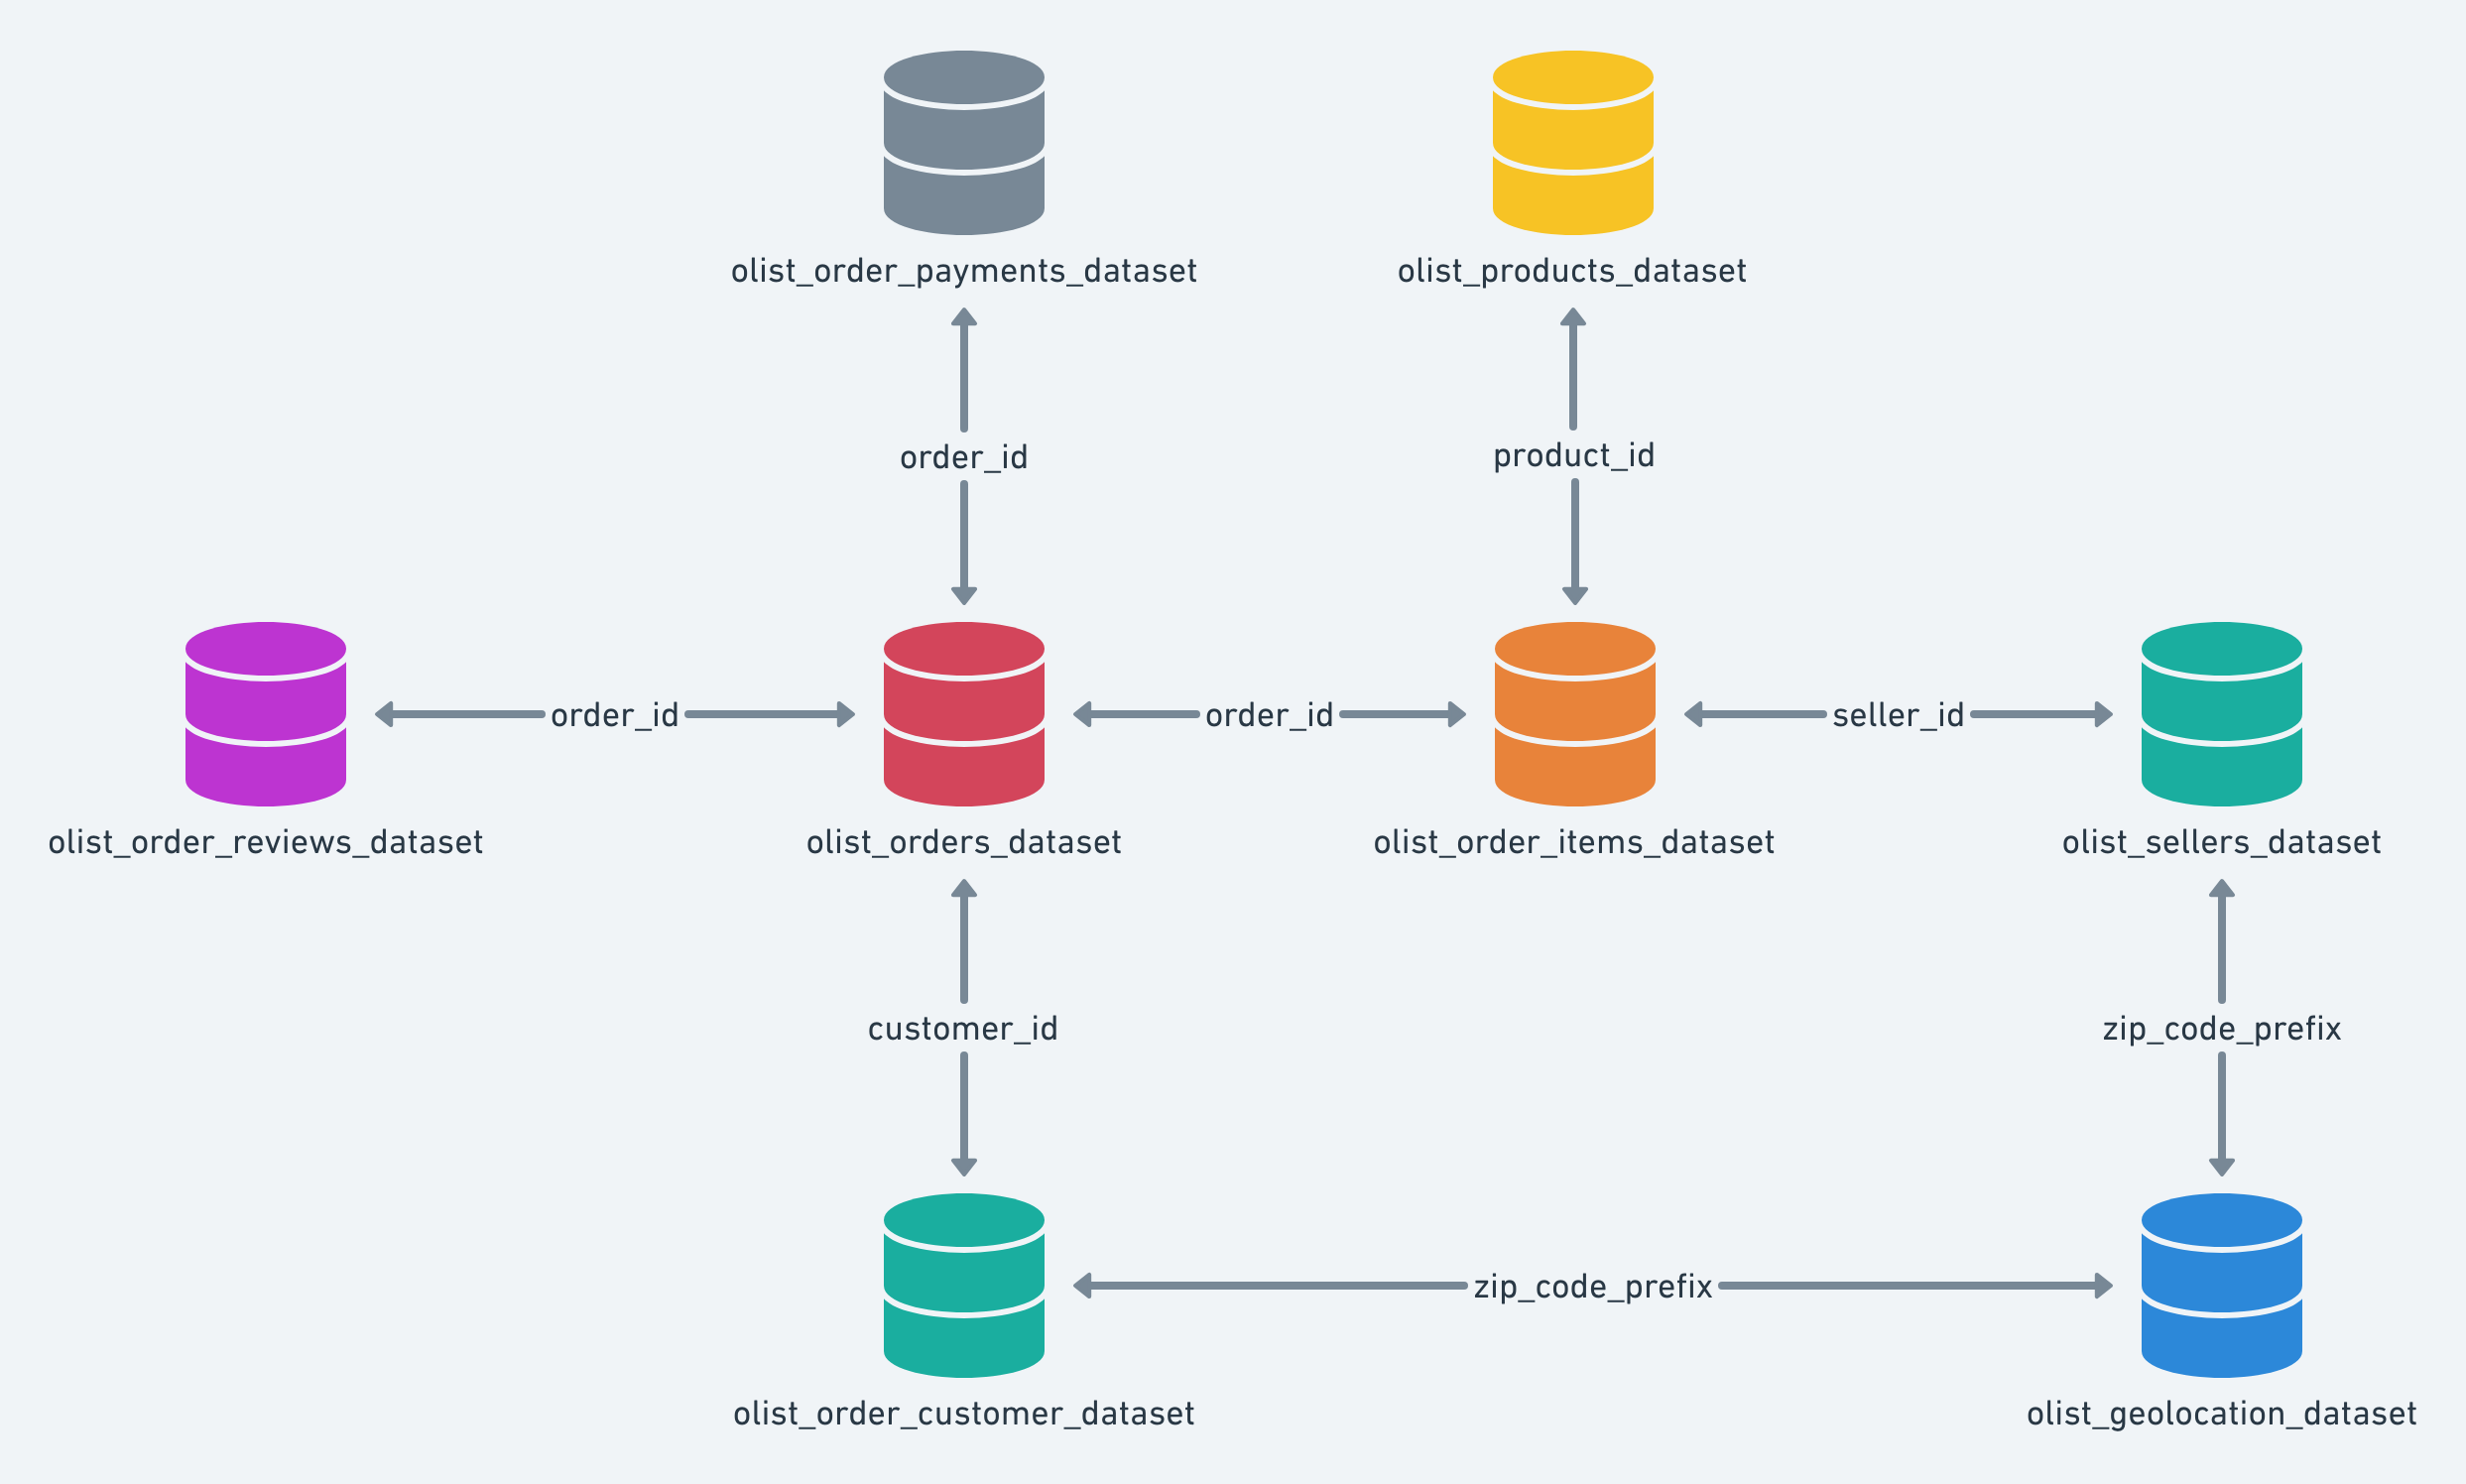


Gambar ini menunjukkan hubungan antar dataset dalam sistem e-commerce, di mana dataset olist_orders_dataset menjadi pusat yang menghubungkan informasi tentang pesanan, ulasan, pembayaran, item pesanan, pelanggan, penjual, dan geolokasi. Dataset ini terhubung dengan olist_order_items_dataset melalui order_id untuk rincian item pesanan, olist_order_reviews_dataset untuk ulasan pelanggan, olist_order_payments_dataset untuk metode pembayaran, dan olist_order_customer_dataset untuk informasi pelanggan. Selain itu, olist_order_items_dataset juga terhubung ke olist_products_dataset untuk rincian produk melalui product_id dan ke olist_sellers_dataset untuk informasi penjual melalui seller_id. Sementara itu, dataset olist_geolocation_dataset terhubung dengan dataset pelanggan dan penjual melalui zip_code_prefix, yang memungkinkan analisis geografis terhadap data pesanan dan penjual.

### Assessing Data

In [15]:
customers_df.info()
print("\nJumlah duplikasi: ", customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Jumlah duplikasi:  0


In [16]:
geolocation_df.info()

print("\nJumlah duplikasi: ", geolocation_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Jumlah duplikasi:  261831


Terdapat 261831 data yang terduplikasi pada geolocation_df

In [17]:
geolocation_df['geolocation_city'].value_counts()

geolocation_city
sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: count, Length: 8011, dtype: int64

In [18]:
# Daftar unik nama kota
cities = geolocation_df['geolocation_city'].unique()

# Menentukan kota target yang ingin dibandingkan
target_city = 'são paulo'

# Mencari kota-kota lain yang mirip dengan target_city
similar_cities = process.extract(target_city, cities)

# Menampilkan hasil
print(similar_cities)

[('são paulo', 100), ('sao paulo', 94), ('sa£o paulo', 94), ('sãopaulo', 93), ('morro de são paulo', 90)]


Terdapat nama kota yang sebenarnya duplikat tetapi hanya berbeda penulisan seperti pada kota 'são paulo'

In [19]:
from fuzzywuzzy import fuzz
import itertools

# Daftar unik nama kota
cities = geolocation_df['geolocation_city'].unique()

# Membuat list untuk menyimpan hasil
similar_cities_list = []

# Membandingkan setiap pasangan kota satu kali menggunakan itertools.combinations untuk menghindari perhitungan berulang
for city1, city2 in itertools.combinations(cities, 2):
    # Menghitung kemiripan antara dua kota
    similarity_score = fuzz.ratio(city1, city2)

    # Menyaring kota-kota yang memiliki kemiripan >= 93
    if similarity_score >= 93:
        similar_cities_list.append((city1, city2, similarity_score))

# Menampilkan hasil
for city1, city2, score in similar_cities_list:
    print(f"Kota: {city1} mirip dengan {city2} dengan skor {score}")


Kota: sao paulo mirip dengan sa£o paulo dengan skor 95
Kota: são paulo mirip dengan sãopaulo dengan skor 94
Kota: sao bernardo do campo mirip dengan são bernardo do campo dengan skor 95
Kota: taboão da serra mirip dengan taboao da serra dengan skor 93
Kota: santana de parnaiba mirip dengan santana de parnaíba dengan skor 95
Kota: jandira mirip dengan jandaira dengan skor 93
Kota: embu-guacu mirip dengan embuguacu dengan skor 95
Kota: embu guacu mirip dengan embuguacu dengan skor 95
Kota: mogi das cruzes mirip dengan mogidascruzes dengan skor 93
Kota: biritiba-mirim mirip dengan biritiba mirim dengan skor 93
Kota: ribeirão pires mirip dengan ribeirao pires dengan skor 93
Kota: sao caetano do sul mirip dengan são caetano do sul dengan skor 94
Kota: bertioga mirip dengan ibertioga dengan skor 94
Kota: sao francisco da praia mirip dengan são francisco da praia dengan skor 95
Kota: itanhaem mirip dengan itanhem dengan skor 93
Kota: itanhaém mirip dengan itanhém dengan skor 93
Kota: lagoinha

Berikut adalah daftar kota yang duplikat, kode di atas akan mengecek tingkat similarity pada kota-kota yang ada di dataframe tersebut, similarity score dibatasi dengan ketentuan >= 93

In [20]:
order_items_df.info()

print("\nJumlah duplikasi: ", order_items_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Jumlah duplikasi:  0


Terdapat kesalahan tipe data pada kolom shipping_limit_date yang harusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [21]:
order_payments_df.info()

print("\nJumlah duplikasi: ", order_payments_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Jumlah duplikasi:  0


In [22]:
order_payments_df.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

In [23]:
order_reviews_df.info()

print("\nJumlah duplikasi: ", order_reviews_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Jumlah duplikasi:  0


Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp yang harusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [24]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat missing values pada kolom review_comment_title dan review_comment_message

In [25]:
orders_df.info()

print("\nJumlah duplikasi: ", orders_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Jumlah duplikasi:  0


Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date yang harusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [26]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat missing values pada kolom order_approved_at, order_delivered_carrier_date,  dan order_delivered_customer_date

In [27]:
products_df.info()

print("\nJumlah duplikasi: ", products_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Jumlah duplikasi:  0


In [28]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat missing values pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm

In [29]:
sellers_df.info()

print("\nJumlah duplikasi: ", sellers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Jumlah duplikasi:  0


In [30]:
product_category_name_df.info()

print("\nJumlah duplikasi: ", product_category_name_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Jumlah duplikasi:  0


**Insight:**
- Data customers_df, order_payments_df, sellers_df, dan product_category_name_df merupakan data yang bersih dari masalah-masalah seperti missing values, duplicated, dan tipe data yang tidak sesuai
- Data geolocation_df memiliki masalah duplikasi data
- Data order_reviews_df, orders_df, dan products_df memiliki masalah missing values
- Data order_items_df, order_reviews_df, dan orders_df memiliki masalah tipe data yang tidak sesuai

Tahap selanjutnya akan berfokus pada penanganan data yang bermasalah.

### Cleaning Data

**Membersihkan tabel `geolocation_df`**

In [31]:
geolocation_df.duplicated().sum()

261831

In [32]:
geolocation_df[geolocation_df.duplicated()]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
15                              1046       -23.546081       -46.644820   
44                              1046       -23.546081       -46.644820   
65                              1046       -23.546081       -46.644820   
66                              1009       -23.546935       -46.636588   
67                              1046       -23.546081       -46.644820   
...                              ...              ...              ...   
1000153                        99970       -28.343273       -51.873734   
1000154                        99950       -28.070493       -52.011342   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
15             sao paulo                SP  
44             sao paulo                SP  
65             sao paulo                SP  
66             sao paulo                SP  
67             sao paulo                SP  
...                  ...               ...  
1000153          ciriaco                RS  
1000154         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000162         tapejara                RS  

[261831 rows x 5 columns]

In [33]:
geolocation_df.drop_duplicates(inplace=True)

**Membersihkan tabel `order_items_df`**

In [34]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [35]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

memperbaiki tipe data menjadi datetime

In [36]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Membersihkan tabel `order_reviews_df`**

In [37]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [38]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [39]:
column_df = ['review_creation_date','review_answer_timestamp']

for column in column_df:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

memperbaiki tipe data menjadi datetime

In [40]:
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [41]:
# Memperbaiki nilai null
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('No Comment Title')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('No Comment')

mengisi missing values yang ada dengan menuliskan 'No Comment'

**Membersihkan tabel `orders_df`**

In [42]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [43]:
column_df = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for column in column_df:
  orders_df[column] = pd.to_datetime(orders_df[column])

memperbaiki tipe data menjadi datetime

In [44]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [45]:
orders_df[orders_df.order_approved_at.isna()]

order_id                       customer_id  \
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
1868   df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2029   8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
...                                 ...                               ...   
97696  5a00b4d35edffc56b825c3646a99ba9d  6a3bdf004ca96338fb5fad1b8d93c2e6   
98415  227c804e2a44760671a6a5697ea549e4  62e7477e75e542243ee62a0ba73f410f   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp order_approved_at  \
1130      canceled      2018-08-28 15:26:39               NaT   
1801      canceled      2018-09-20 13:54:16               NaT   
1868      canceled      2017-03-04 12:14:30               NaT   
2029      canceled      2018-08-29 16:27:49               NaT   
2161      canceled      2017-05-01 16:12:39               NaT   
...            ...                      ...               ...   
97696     canceled      2017-07-02 15:38:46               NaT   
98415     canceled      2017-09-28 15:02:56               NaT   
98909     canceled      2018-08-07 11:16:28               NaT   
99283     canceled      2018-08-31 16:13:44               NaT   
99347     canceled      2018-09-06 18:45:47               NaT   

      order_delivered_carrier_date order_delivered_customer_date  \
1130                           NaT                           NaT   
1801                           NaT                           NaT   
1868                           NaT                           NaT   
2029                           NaT                           NaT   
2161                           NaT                           NaT   
...                            ...                           ...   
97696                          NaT                           NaT   
98415                          NaT                           NaT   
98909                          NaT                           NaT   
99283                          NaT                           NaT   
99347                          NaT                           NaT   

      order_estimated_delivery_date  
1130                     2018-09-12  
1801                     2018-10-17  
1868                     2017-04-10  
2029                     2018-09-13  
2161                     2017-05-30  
...                             ...  
97696                    2017-07-25  
98415                    2017-10-16  
98909                    2018-08-10  
99283                    2018-10-01  
99347                    2018-09-27  

[160 rows x 8 columns]

melihat missing values pada kolom order_approved_at

In [46]:
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [47]:
orders_df[orders_df['order_status'] == 'canceled']

order_id                       customer_id  \
397    1b9ecfe83cdc259250e1a8aca174f0ad  6d6b50b66d79f80827b6d96751528d30   
613    714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
1058   3a129877493c8189c59c60eb71d97c29  0913cdce793684e52bbfac69d87e91fd   
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
...                                 ...                               ...   
98791  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99143  6560fb10610771449cb0463c5ba12199  0d07d0a588caf93cc66b7a8aff86d2fe   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp   order_approved_at  \
397       canceled      2018-08-04 14:29:27 2018-08-07 04:10:26   
613       canceled      2018-01-26 21:34:08 2018-01-26 21:58:39   
1058      canceled      2018-01-25 13:34:24 2018-01-25 13:50:20   
1130      canceled      2018-08-28 15:26:39                 NaT   
1801      canceled      2018-09-20 13:54:16                 NaT   
...            ...                      ...                 ...   
98791     canceled      2017-03-11 19:51:36 2017-03-11 19:51:36   
98909     canceled      2018-08-07 11:16:28                 NaT   
99143     canceled      2017-10-01 22:26:25 2017-10-01 22:35:22   
99283     canceled      2018-08-31 16:13:44                 NaT   
99347     canceled      2018-09-06 18:45:47                 NaT   

      order_delivered_carrier_date order_delivered_customer_date  \
397                            NaT                           NaT   
613            2018-01-29 22:33:25                           NaT   
1058           2018-01-26 21:42:18                           NaT   
1130                           NaT                           NaT   
1801                           NaT                           NaT   
...                            ...                           ...   
98791                          NaT                           NaT   
98909                          NaT                           NaT   
99143                          NaT                           NaT   
99283                          NaT                           NaT   
99347                          NaT                           NaT   

      order_estimated_delivery_date  
397                      2018-08-14  
613                      2018-02-22  
1058                     2018-02-23  
1130                     2018-09-12  
1801                     2018-10-17  
...                             ...  
98791                    2017-03-30  
98909                    2018-08-10  
99143                    2017-10-27  
99283                    2018-10-01  
99347                    2018-09-27  

[625 rows x 8 columns]

melihat missing values pada baris data yang order_status nya canceled

**Membersihkan tabel `products_df`**

In [48]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [49]:
products_df[products_df.product_category_name.isna()]

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

In [50]:
products_df['product_category_name'] = products_df['product_category_name'].fillna('Unknown')

mengisi missing values pada kolom product_category_name dengan menuliskan 'Unknown'

In [51]:
products_df[products_df['product_category_name'] == 'Unknown']

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a               Unknown   
128    d8dee61c2034d6d075997acef1870e9b               Unknown   
145    56139431d72cd51f19eb9f7dae4d1617               Unknown   
154    46b48281eb6d663ced748f324108c733               Unknown   
197    5fb61f482620cb672f5e586bb132eae9               Unknown   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a               Unknown   
32589  10dbe0fbaa2c505123c17fdc34a63c56               Unknown   
32616  bd2ada37b58ae94cc838b9c0569fecd8               Unknown   
32772  fa51e914046aab32764c41356b9d4ea4               Unknown   
32852  c4ceee876c82b8328e9c293fa0e1989b               Unknown   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

In [52]:
# Daftar kolom yang akan dimodifikasi
columns_to_fill = [
    'product_weight_g',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

# Ganti nilai null pada kolom yang dipilih dengan -1 untuk baris yang kolom product_category_name-nya adalah 'Unknown'
products_df.loc[products_df['product_category_name'] == 'Unknown', columns_to_fill] = products_df.loc[products_df['product_category_name'] == 'Unknown', columns_to_fill].fillna(-1)

mengisi missing values yang ada dengan -1

In [53]:
products_df[products_df['product_category_name'] == 'Unknown']

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a               Unknown   
128    d8dee61c2034d6d075997acef1870e9b               Unknown   
145    56139431d72cd51f19eb9f7dae4d1617               Unknown   
154    46b48281eb6d663ced748f324108c733               Unknown   
197    5fb61f482620cb672f5e586bb132eae9               Unknown   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a               Unknown   
32589  10dbe0fbaa2c505123c17fdc34a63c56               Unknown   
32616  bd2ada37b58ae94cc838b9c0569fecd8               Unknown   
32772  fa51e914046aab32764c41356b9d4ea4               Unknown   
32852  c4ceee876c82b8328e9c293fa0e1989b               Unknown   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                   -1.0                        -1.0                -1.0   
128                   -1.0                        -1.0                -1.0   
145                   -1.0                        -1.0                -1.0   
154                   -1.0                        -1.0                -1.0   
197                   -1.0                        -1.0                -1.0   
...                    ...                         ...                 ...   
32515                 -1.0                        -1.0                -1.0   
32589                 -1.0                        -1.0                -1.0   
32616                 -1.0                        -1.0                -1.0   
32772                 -1.0                        -1.0                -1.0   
32852                 -1.0                        -1.0                -1.0   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

In [54]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [55]:
products_df[products_df.product_weight_g.isna()]

product_id product_category_name  \
8578  09ff539a621711667c43eba6a3bd8466                 bebes   

      product_name_lenght  product_description_lenght  product_photos_qty  \
8578                 60.0                       865.0                 3.0   

      product_weight_g  product_length_cm  product_height_cm  product_width_cm  
8578               NaN                NaN                NaN               NaN

In [56]:
products_df.fillna(-1,inplace=True)

mengisi missing values yang ada dengan -1

**Insight:**
- Pada data `order_reviews_df`, missing values diisi dengan 'No Comment' hal ini agar data dapat diolah ke depannya pada kasus-kasus tertentu, pemilihan value tersebut adalah agar tidak ada asumsi yang subjektif atas kekosongan nilai pada kolom tersebut

- Pada data `orders_df`, kolom-kolom yang memiliki missing values tidak dilakukan imputasi. Hal ini dikarenakan belum diketahui pasti penyebab missing values tersebut, bisa saja missing values disebabkan pesanan dibatalkan atau belum dikirim yang menyebabkan beberapa kolom lainnya bernilai null atau bisa juga terdapat kesalahan pada pengumpulan datanya. Oleh karena itu lebih baik missing values ini dibiarkan agar dapat dilakukan analisis lebih lanjut setelah mendapat pemahaman yang lebih baik

- Pada data `products_df`, kolom product_category_name yang memiliki missing values diisi menjadi 'Unknown' karena belum diketahui termasuk dalam kategori yang mana. Pada kolom product_name_lenght,	product_description_lenght,	product_photos_qty,	product_weight_g,	product_length_cm,	product_height_cm,	dan product_width_cm yang memiliki missing values diisi dengan value -1, hal ini dikarenakan masih belum diketahui value yang tepat untuk mengisinya. Diperlukan analisis lebih lanjut terkait penentuan imputasi pada data ini, value 'Unknown' dan -1 berguna agar memisahkan data yang bersih sehingga data yang kotor ini dapat dianalisis secara terpisah untuk penentuan imputasi

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [57]:
customers_df.sample(5)

customer_id                customer_unique_id  \
55877  010c697e9133c540d8acf1535533f7db  408d1227fdad76c0cc0c03f202f4a6eb   
226    05075b9433e8f047f3ba7a5ada189809  212c759d8c4f2d4d9d6fd4c7de0afbb3   
49956  85edc80a16b4badbc1e58061b6ba26e3  93b6131ab9ec17f66ed8d5104307acb9   
25446  5a29bb3c06beeea41656884b0a459d1c  fd6518dc052693fe3eeec7973974afba   
28187  d3a6febf47e02bf9635d6b8e8443092e  995bb1c47d900b47cd32436d8a622593   

       customer_zip_code_prefix    customer_city customer_state  
55877                     77015           palmas             TO  
226                       25245  duque de caxias             RJ  
49956                     22240   rio de janeiro             RJ  
25446                      2271        sao paulo             SP  
28187                     30380   belo horizonte             MG

In [58]:
customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

In [59]:
customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

Berdasarkan kedua pivot table di atas dapat terlihat bahwa kota Sao Paulo di negara bagian Sao Paulo (SP) menjadi kota dengan jumlah pelanggan terbanyak diikuti dengan Rio de Janeiro di negara bagian Rio de Janeiro (RJ)

### Explore `geolocation_df`

In [60]:
geolocation_df.sample(5)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
157407                         6396       -23.525233       -46.854375   
896675                        87306       -24.051359       -52.409362   
840941                        79827       -22.213913       -54.811257   
794474                        73801       -15.544272       -47.336449   
352305                        15370       -20.628689       -51.103054   

       geolocation_city geolocation_state  
157407      carapicuiba                SP  
896675     campo mourao                PR  
840941         dourados                MS  
794474          formosa                GO  
352305  pereira barreto                SP

In [61]:
geolocation_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_state
SP    6349
MG    1868
RJ    1390
RS    1132
PR    1046
BA     992
GO     773
SC     620
PE     596
CE     548
DF     516
PB     324
ES     315
MA     313
PA     309
PI     307
RN     280
MT     254
MS     242
TO     184
AL     178
AM     144
SE     135
RO     108
AC      46
RR      28
AP      26
Name: geolocation_zip_code_prefix, dtype: int64

Dataframe ini berisi informasi kode pos Brazil dan koordinat lintangnya

### Explore `order_items_df`

In [62]:
order_items_df.sample(5)

order_id  order_item_id  \
32057   48a957d6e7477f9bce68d7b419f91515              1   
96003   d9d4008eda3f55c6d4fff91cff923793              1   
103643  eb6027d9c2cabcf472d0ebf817b4ef05              1   
34665   4e743d407939e965ac0b7bb694e67eed              1   
90790   ce3756a051e619f9a749a8795aee498f              4   

                              product_id                         seller_id  \
32057   6aa7792ae76dad7d68331915fb2602c7  7ade73f1b9b4e965f9009a4c3a7e2c15   
96003   a70d74f54feefedd8108c45553766340  a6fe7de3d16f6149ffe280349a8535a0   
103643  389d119b48cf3043d311335e499d9c6b  1f50f920176fa81dab994f9023523100   
34665   914c9e9af640dd56f48764a225b00f89  7c67e1448b00f6e969d365cea6b010ab   
90790   c2c989ac5100e59a6c3d12b2c31a2c72  8a32e327fe2c1b3511609d81aaf9f042   

       shipping_limit_date  price  freight_value  
32057  2018-06-12 22:31:19  50.00          13.71  
96003  2017-12-18 03:53:04  49.90          11.85  
103643 2017-10-09 21:35:14  59.90          13.44  
34665  2018-06-19 15:31:47  79.98          35.57  
90790  2017-03-08 06:45:14  12.99          15.56

In [63]:
order_items_df['total_order_value'] = order_items_df['order_item_id'] * (order_items_df['price'] + order_items_df['freight_value'])

Berdasarkan keterangan pada dataset, kita bisa mendapatkan nilai harga keseluruhan dari tiap order dengan rumus:

```
total harga pesanan = banyaknya barang : (harga barang + biaya kirim)
```



In [64]:
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  total_order_value  
0 2017-09-19 09:45:35   58.90          13.29              72.19  
1 2017-05-03 11:05:13  239.90          19.93             259.83  
2 2018-01-18 14:48:30  199.00          17.87             216.87  
3 2018-08-15 10:10:18   12.99          12.79              25.78  
4 2017-02-13 13:57:51  199.90          18.14             218.04

In [65]:
order_items_df.describe()

order_item_id            shipping_limit_date          price  \
count  112650.000000                         112650  112650.000000   
mean        1.197834  2018-01-07 15:36:52.192685312     120.653739   
min         1.000000            2016-09-19 00:15:34       0.850000   
25%         1.000000     2017-09-20 20:57:27.500000      39.900000   
50%         1.000000            2018-01-26 13:59:35      74.990000   
75%         1.000000  2018-05-10 14:34:00.750000128     134.900000   
max        21.000000            2020-04-09 22:35:08    6735.000000   
std         0.705124                            NaN     183.633928   

       freight_value  total_order_value  
count  112650.000000      112650.000000  
mean       19.990320         160.304175  
min         0.000000           6.080000  
25%        13.080000          61.070000  
50%        16.260000         103.550000  
75%        21.150000         175.870000  
max       409.680000       13664.080000  
std        15.806405         228.532489

Rata-rata pendapatan yang didapatkan dari penjualan adalah sebesar R$ 160.304175

In [66]:
order_items_df[order_items_df['total_order_value'] == 13664.080000]

order_id  order_item_id  \
1654  03caa2c082116e1d31e67e9ae3700499              8   

                            product_id                         seller_id  \
1654  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   

     shipping_limit_date   price  freight_value  total_order_value  
1654 2017-10-06 15:28:20  1680.0          28.01           13664.08

In [67]:
products_df[products_df['product_id'] == '489ae2aa008f021502940f251d4cce7f']

product_id  product_category_name  \
5899  489ae2aa008f021502940f251d4cce7f  utilidades_domesticas   

      product_name_lenght  product_description_lenght  product_photos_qty  \
5899                 31.0                       875.0                 2.0   

      product_weight_g  product_length_cm  product_height_cm  product_width_cm  
5899           30000.0               60.0               61.0              33.0

### Explore `order_payments_df`

In [68]:
order_payments_df.sample(5)

order_id  payment_sequential payment_type  \
32464  2b1d82acc9561318937048bf5ea0a990                   1  credit_card   
34350  9ea0ebee145dfb3f4790d6637345db21                   1  credit_card   
16751  2efd11439a203a20e9a473a10a2c18f1                   1  credit_card   
49304  fb5162f6bb1fae60905bc92d1f1c6e49                   1  credit_card   
47883  94fcdee942970d335d394f37a3b23ada                   1       boleto   

       payment_installments  payment_value  
32464                     3          85.16  
34350                     1         106.87  
16751                     8         768.41  
49304                     4         235.28  
47883                     1         269.12

In [69]:
order_payments_df.describe(include='all')

order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000  103886.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853349     154.100380  
std                 2.687051     217.494064  
min                 0.000000       0.000000  
25%                 1.000000      56.790000  
50%                 1.000000     100.000000  
75%                 4.000000     171.837500  
max                24.000000   13664.080000

In [70]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_installments": ["max", "min", "mean", "std"],
    "payment_value": ["max", "min", "mean", "std"]
})

order_id payment_installments                         \
              nunique                  max min      mean      std   
payment_type                                                        
boleto          19784                    1   1  1.000000  0.00000   
credit_card     76505                   24   0  3.507155  2.85099   
debit_card       1528                    1   1  1.000000  0.00000   
not_defined         3                    1   1  1.000000  0.00000   
voucher          3866                    1   1  1.000000  0.00000   

             payment_value                                 
                       max    min        mean         std  
payment_type                                               
boleto             7274.88  11.62  145.034435  213.581061  
credit_card       13664.08   0.01  163.319021  222.119311  
debit_card         4445.50  13.38  142.570170  245.793401  
not_defined           0.00   0.00    0.000000    0.000000  
voucher            3184.34   0.00   65.703354  115.519185

Credit Card adalah metode pembayaran yang paling sering digunakan, dengan 76505 pesanan yang menggunakan metode ini dan menjadi satu-satunya metode yang memiliki opsi pembayaran dengan cicilan, dengan rata-rata 3.5 cicilan dan maksimum hingga 24 cicilan. Sedangkan Boleto (sejenis sistem pembayaran yang populer di Brazil) adalah metode pembayaran kedua yang paling sering digunakan, dengan 19784 pesanan.

### Explore `order_reviews_df`

In [71]:
order_reviews_df.sample(5)

review_id                          order_id  \
81338  454f78bc3062cad652f00d539f22aa49  b14a1c7ea024e1b7299a4904ef1eeb4a   
31197  207608b278634faecc647ad768b29354  5aa16b50755d8657183ae7ea1a74543b   
49883  901bca3d318d8b738e31ae94132f1c17  0dbcaa88e213607d3795e96eda505c73   
26881  970d116dff1c32cf15efb6cc4b92dcc7  d67fdefdd78c824692a1f0cab56e71c5   
29050  55873f0480536018387cd1284f911604  b9fbe4b4e0e872ccaa4e477d2a4751a3   

       review_score review_comment_title  \
81338             5     No Comment Title   
31197             4     No Comment Title   
49883             5            Excelente   
26881             3  Lindo porém frágil.   
29050             5     No Comment Title   

                                  review_comment_message review_creation_date  \
81338                                         No Comment           2018-03-17   
31197                 Não gostei tanto assim do produto.           2017-08-24   
49883                                Produto excelente.            2018-07-08   
26881  O pendente é lindo, vermelho super brilhante i...           2018-05-01   
29050                                         Recomendo            2017-12-03   

      review_answer_timestamp  
81338     2018-03-20 00:55:31  
31197     2017-08-27 23:33:06  
49883     2018-07-08 22:08:01  
26881     2018-05-03 00:09:35  
29050     2017-12-03 21:50:58

In [72]:
delivery_review_time = order_reviews_df["review_answer_timestamp"] - order_reviews_df["review_creation_date"]
delivery_review_time = delivery_review_time.apply(lambda x: x.total_seconds())
order_reviews_df["delivery_review_time"] = round(delivery_review_time/86400)

In [73]:
order_reviews_df.describe(include="all")

review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

        review_score review_comment_title review_comment_message  \
count   99224.000000                99224                  99224   
unique           NaN                 4528                  36160   
top              NaN     No Comment Title             No Comment   
freq             NaN                87656                  58247   
mean        4.086421                  NaN                    NaN   
min         1.000000                  NaN                    NaN   
25%         4.000000                  NaN                    NaN   
50%         5.000000                  NaN                    NaN   
75%         5.000000                  NaN                    NaN   
max         5.000000                  NaN                    NaN   
std         1.347579                  NaN                    NaN   

                 review_creation_date        review_answer_timestamp  \
count                           99224                          99224   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2018-01-12 20:49:23.948238336  2018-01-16 00:23:56.977938688   
min               2016-10-02 00:00:00            2016-10-07 18:32:28   
25%               2017-09-23 00:00:00  2017-09-27 01:53:27.249999872   
50%               2018-02-02 00:00:00     2018-02-04 22:41:47.500000   
75%               2018-05-16 00:00:00     2018-05-20 12:11:21.500000   
max               2018-08-31 00:00:00            2018-10-29 12:27:35   
std                               NaN                            NaN   

        delivery_review_time  
count           99224.000000  
unique                   NaN  
top                      NaN  
freq                     NaN  
mean                3.213658  
min                 0.000000  
25%                 1.000000  
50%                 2.000000  
75%                 3.000000  
max               519.000000  
std                 9.904641

Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pemberian review sebesar 3 hari dengan nilai maksimum sebesar 519 hari dan nilai minimum sebesar 0 hari.

### Explore `orders_df`

In [74]:
orders_df.sample(5)

order_id                       customer_id  \
81132  95b74d8655449a874d68ca9492795e6f  e13ac4b330bafd08d479a5451eea6532   
20166  7fee8248879e6c2eb655918584bb3ba2  0ac397ec20446825a099a646258cbf83   
61430  705e297aabac0f1fae1db3971e90952d  96e664af0b18d12494b2a31ab2642c45   
94540  e90ec4b6b234181833371ada5474c96b  cee87c1ba63da17e6d9aded0ec8c6627   
2135   d905ea9eb4e5000a35cbee306bce1935  8bceb21c15bad608c6606d297ee46d8c   

      order_status order_purchase_timestamp   order_approved_at  \
81132    delivered      2018-03-17 19:51:33 2018-03-20 03:15:34   
20166    delivered      2018-01-13 08:21:43 2018-01-13 08:31:20   
61430    delivered      2018-06-12 19:05:27 2018-06-12 19:28:35   
94540    delivered      2017-04-19 22:50:00 2017-04-19 23:02:15   
2135     delivered      2018-06-19 18:05:41 2018-06-20 08:56:34   

      order_delivered_carrier_date order_delivered_customer_date  \
81132          2018-03-21 18:41:35           2018-03-24 14:54:27   
20166          2018-01-18 22:36:29           2018-01-26 13:57:59   
61430          2018-06-14 13:20:00           2018-06-25 17:32:07   
94540          2017-04-20 09:49:57           2017-05-03 14:47:34   
2135           2018-06-20 14:55:00           2018-06-25 15:49:42   

      order_estimated_delivery_date  
81132                    2018-04-13  
20166                    2018-02-05  
61430                    2018-07-13  
94540                    2017-05-12  
2135                     2018-07-04

In [75]:
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())

approval_time = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
approval_time = approval_time.apply(lambda x: x.total_seconds())

delay_in_delivery = orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']
delay_in_delivery = delay_in_delivery.apply(lambda x: x.total_seconds())


orders_df["delivery_time"] = round(delivery_time/86400)
orders_df['approval_time'] = round(approval_time/86400)
orders_df['delay_in_delivery'] = round(delay_in_delivery/86400)


In [76]:
orders_df.describe()

order_purchase_timestamp              order_approved_at  \
count                          99441                          99281   
mean   2017-12-31 08:43:12.776581120  2017-12-31 18:35:24.098800128   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%              2017-09-12 14:46:19            2017-09-12 23:24:16   
50%              2018-01-18 23:04:36            2018-01-19 11:36:13   
75%              2018-05-04 15:42:16            2018-05-04 20:35:10   
max              2018-10-17 17:30:18            2018-09-03 17:40:06   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          97658                          96476   
mean   2018-01-04 21:49:48.138278656  2018-01-14 12:09:19.035542272   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%    2017-09-15 22:28:50.249999872  2017-09-25 22:07:22.249999872   
50%              2018-01-24 16:10:58     2018-02-02 19:28:10.500000   
75%              2018-05-08 13:37:45  2018-05-15 22:48:52.249999872   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   
std                              NaN                            NaN   

       order_estimated_delivery_date  delivery_time  approval_time  \
count                          99441   96476.000000   99281.000000   
mean   2018-01-24 03:08:37.730111232      12.517548       0.427272   
min              2016-09-30 00:00:00       1.000000       0.000000   
25%              2017-10-03 00:00:00       7.000000       0.000000   
50%              2018-02-15 00:00:00      10.000000       0.000000   
75%              2018-05-25 00:00:00      16.000000       1.000000   
max              2018-11-12 00:00:00     210.000000     188.000000   
std                              NaN       9.550516       1.106265   

       delay_in_delivery  
count       96476.000000  
mean          -11.008655  
min          -146.000000  
25%           -16.000000  
50%           -12.000000  
75%            -6.000000  
max           189.000000  
std            10.190594

Berdasarkan hasil tersebut dapat diketahui bahwa :
1. Rata-rata waktu pengiriman adalah 12 hari
2. Rata-rata waktu persetujuan pesanan adalah 0.427272 atau kurang dari setengah hari
3. Rata-rata waktu pengiriman dilakukan tepat waktu dengan maksimal keterlambatan 189 hari



### Explore `products_df`

In [77]:
products_df.sample(5)

product_id product_category_name  \
25763  14ad6805c263d8d758d648f46a06570e                 bebes   
27023  faa51d5c696ac870bc1ec1c6d3691c15            automotivo   
2392   8aa1ba72d595bcf58ead2e5636f006cc     moveis_escritorio   
9070   a3648c962d60ced36f589f0500cdcb60            automotivo   
24394  2990952a0c7c8dd6c64d1db4d183c1fb             telefonia   

       product_name_lenght  product_description_lenght  product_photos_qty  \
25763                 30.0                       782.0                 1.0   
27023                 54.0                       223.0                 1.0   
2392                  59.0                      1298.0                 1.0   
9070                  57.0                      1461.0                 1.0   
24394                 59.0                       818.0                 6.0   

       product_weight_g  product_length_cm  product_height_cm  \
25763             350.0               18.0               14.0   
27023            1650.0               41.0               19.0   
2392             9350.0               52.0               52.0   
9070              100.0               16.0               27.0   
24394             250.0               17.0                4.0   

       product_width_cm  
25763              18.0  
27023              41.0  
2392               17.0  
9070               15.0  
24394              12.0

In [78]:
products_df.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32951.000000                32951.000000        32951.000000   
mean             47.561015                  757.194592            2.129951   
std              12.145445                  637.767052            1.773499   
min              -1.000000                   -1.000000           -1.000000   
25%              41.000000                  326.000000            1.000000   
50%              51.000000                  584.000000            1.000000   
75%              57.000000                  961.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32951.000000       32951.000000       32951.000000   
mean        2276.334254          30.813147          16.936572   
std         4281.945534          16.915761          13.637856   
min           -1.000000          -1.000000          -1.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32951.000000  
mean          23.195260  
std           12.080152  
min           -1.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

In [79]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 74, dtype: int64

Berdasarkan hasil tersebut, 5 kategori produk yang paling banyak yang akan dijual yaitu

1. cama_mesa_banho
2. esporte_lazer
3. moveis_decoracao
4. beleza_saude
5. utilidades_domesticas



### Explore `sellers_df`

In [80]:
sellers_df.sample(5)

seller_id  seller_zip_code_prefix seller_city  \
317   5acd070dd3fe441bbb2ec1f1ede515ee                   13203     jundiai   
1142  1967a9e2ad6f51802b093147d861df58                    1209   sao paulo   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   
2444  96804ea39d96eb908e7c3afdb671bb9e                   38950        ibia   
166   c8e135e7b21ecbc36c1153a29d2f5a06                    1411   sao paulo   

     seller_state  
317            SP  
1142           SP  
3094           SP  
2444           MG  
166            SP

In [81]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [82]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

Berdasarkan kedua pivot table di atas dapat terlihat bahwa kota Sao Paulo di negara bagian Sao Paulo (SP) menjadi kota dengan jumlah penjual terbanyak diikuti dengan Curitiba di negara bagian Parana (PR)

### Explore `customers_df`, `orders_df`, `order_reviews_df`

In [83]:
customers_df.sample(5)

customer_id                customer_unique_id  \
60698  eba6b4c02a87d8d361314e878cd67fdb  3804cddc3064035865547f06aff7e1ae   
45410  c0e65afe04469997d2af127cd0c461a1  6627561739ed1d8426400696df79f653   
80275  8ea09313c0ee536559d17faa08b62eb4  0b903538f8e4450b56591eedca26d473   
45812  41f7392232f044ac07529df63336f9bc  533a17479e9f1cbe8d564a3c7673ad32   
14067  cccc11e51686391aabfac06aa505884a  7e547621c3bee24442820be4b5a9ac4d   

       customer_zip_code_prefix customer_city customer_state  
60698                      3591     sao paulo             SP  
45410                     13482       limeira             SP  
80275                     45350       itirucu             BA  
45812                     24240       niteroi             RJ  
14067                     11730      mongagua             SP

In [84]:
orders_df.sample(5)

order_id                       customer_id  \
97949  8394892177e59c9293914e83fe4c4dfe  d8b1047c56cbd858aa50fb5bf85976cf   
34247  2c6a443a179d58ca22cbb911e1aec4fb  acf8ca57c25914876742d5dfe72aa44c   
2970   a313d68655c65a778d04823ab8e2e5a2  197681a5dfd0b55a552f223225f5dd86   
92497  3d7f13cbce981bf24fdb6f18dc1f174d  dcf43e1fa6f118059382349530ff731d   
78997  4ce2a78f4b4b1166f0e04bbdc825f7b3  d615aea633470f9686f84cec51940be8   

      order_status order_purchase_timestamp   order_approved_at  \
97949    delivered      2018-06-08 20:40:52 2018-06-09 20:35:13   
34247    delivered      2018-08-10 09:20:02 2018-08-10 09:30:20   
2970     delivered      2017-11-19 21:25:48 2017-11-19 21:46:31   
92497    delivered      2017-05-07 18:42:26 2017-05-07 18:55:07   
78997    delivered      2018-08-16 09:41:52 2018-08-16 09:50:25   

      order_delivered_carrier_date order_delivered_customer_date  \
97949          2018-06-15 16:32:00           2018-06-30 11:54:33   
34247          2018-08-13 16:11:00           2018-08-16 23:32:27   
2970           2017-11-21 18:46:51           2017-11-27 16:17:08   
92497          2017-05-10 09:54:40           2017-05-18 08:22:18   
78997          2018-08-16 15:14:00           2018-08-22 15:06:41   

      order_estimated_delivery_date  delivery_time  approval_time  \
97949                    2018-07-23           22.0            1.0   
34247                    2018-08-16            7.0            0.0   
2970                     2017-12-08            8.0            0.0   
92497                    2017-06-05           11.0            0.0   
78997                    2018-09-06            6.0            0.0   

       delay_in_delivery  
97949              -23.0  
34247                1.0  
2970               -10.0  
92497              -18.0  
78997              -14.0

In [85]:
order_reviews_df.sample(5)

review_id                          order_id  \
22171  b63c7192610e841ab6225818af257f0d  4c3a834add3595c42eaefa65d28d6fbe   
37942  3f051dbf71cf8e6dd11035d7e0f59935  4d5b79c88c8dba7bccfd90eb531c21be   
6099   54d9494c037eafacb61d86b6da1b143b  a4131292599279a50b734fb7fbf83c0c   
17000  72a2b80beb82d04813eff9df33bec312  957e60e8b06f5c61044ad86aa626cd49   
90035  63fb20aece038e3ad34000e2c5700ac4  523f7d5ee2ea5775addb6d622b17f92b   

       review_score review_comment_title  \
22171             4     No Comment Title   
37942             2     No Comment Title   
6099              5     No Comment Title   
17000             1     No Comment Title   
90035             4     No Comment Title   

                                  review_comment_message review_creation_date  \
22171                                         No Comment           2018-08-22   
37942  O produto não é o mesmo da foto, fiquei com o ...           2018-04-24   
6099                     Linda cortina. Adorei o tecido            2017-03-09   
17000                                         No Comment           2017-12-30   
90035                                         No Comment           2017-11-24   

      review_answer_timestamp  delivery_review_time  
22171     2018-08-23 01:09:18                   1.0  
37942     2018-04-25 01:51:05                   1.0  
6099      2017-03-10 00:01:01                   1.0  
17000     2017-12-30 23:50:16                   1.0  
90035     2017-11-29 13:29:02                   6.0

In [86]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_time  approval_time  \
0                    2017-10-18            8.0            0.0   
1                    2018-08-13           14.0            1.0   
2                    2018-09-04            9.0            0.0   
3                    2017-12-15           13.0            0.0   
4                    2018-02-26            3.0            0.0   

   delay_in_delivery                customer_unique_id  \
0               -7.0  7c396fd4830fd04220f754e42b4e5bff   
1               -5.0  af07308b275d755c9edb36a90c618231   
2              -17.0  3a653a41f6f9fc3d2a113cf8398680e8   
3              -13.0  7c142cf63193a1473d2e66489a9ae977   
4               -9.0  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  
0                      3149                sao paulo             SP  
1                     47813                barreiras             BA  
2                     75265               vianopolis             GO  
3                     59296  sao goncalo do amarante             RN  
4                      9195              santo andre             SP

In [87]:
reviews_orders_customers_df = pd.merge(
    left=orders_customers_df,
    right=order_reviews_df,
    how='left',
    left_on="order_id",
    right_on="order_id"
)
reviews_orders_customers_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_time  approval_time  ...  \
0                    2017-10-18            8.0            0.0  ...   
1                    2018-08-13           14.0            1.0  ...   
2                    2018-09-04            9.0            0.0  ...   
3                    2017-12-15           13.0            0.0  ...   
4                    2018-02-26            3.0            0.0  ...   

   customer_zip_code_prefix            customer_city  customer_state  \
0                      3149                sao paulo              SP   
1                     47813                barreiras              BA   
2                     75265               vianopolis              GO   
3                     59296  sao goncalo do amarante              RN   
4                      9195              santo andre              SP   

                          review_id review_score review_comment_title  \
0  a54f0611adc9ed256b57ede6b6eb5114          4.0     No Comment Title   
1  8d5266042046a06655c8db133d120ba5          4.0     Muito boa a loja   
2  e73b67b67587f7644d5bd1a52deb1b01          5.0     No Comment Title   
3  359d03e676b3c069f62cadba8dd3f6e8          5.0     No Comment Title   
4  e50934924e227544ba8246aeb3770dd4          5.0     No Comment Title   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1                               Muito bom o produto.           2018-08-08   
2                                         No Comment           2018-08-18   
3  O produto foi exatamente o que eu esperava e e...           2017-12-03   
4                                         No Comment           2018-02-17   

  review_answer_timestamp delivery_review_time  
0     2017-10-12 03:43:48                  1.0  
1     2018-08-08 18:37:50                  1.0  
2     2018-08-22 19:07:58                  5.0  
3     2017-12-05 19:21:58                  3.0  
4     2018-02-18 13:02:51                  2.0  

[5 rows x 22 columns]

In [88]:
reviews_orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

customer_city  order_id
0              sao paulo     15540
1         rio de janeiro      6882
2         belo horizonte      2773
3               brasilia      2131
4               curitiba      1521
5               campinas      1444
6           porto alegre      1379
7               salvador      1245
8              guarulhos      1189
9  sao bernardo do campo       938

In [89]:
reviews_orders_customers_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

review_score  order_id
0           5.0     57076
1           4.0     19098
2           1.0     11393
3           3.0      8160
4           2.0      3148

In [90]:
reviews_orders_customers_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "review_score": "mean"
}).sort_values(by="review_score", ascending=False)

order_id  review_score
customer_state                        
AP                    68      4.194030
AM                   148      4.183673
PR                  5045      4.180032
SP                 41746      4.173951
MG                 11635      4.136172
RS                  5466      4.133321
MS                   715      4.118785
RN                   485      4.105809
MT                   907      4.102990
TO                   280      4.096774
SC                  3637      4.071764
DF                  2140      4.064711
RO                   253      4.051587
AC                    81      4.049383
GO                  2020      4.042490
ES                  2033      4.041667
PB                   536      4.018832
PE                  1652      4.011543
PI                   495      3.920570
RJ                 12852      3.874971
BA                  3380      3.860888
CE                  1336      3.851016
PA                   975      3.849174
SE                   350      3.808023
MA                   747      3.764075
AL                   413      3.751208
RR                    46      3.608696

Berdasarkan pivot table di atas dapat diketahui bahwa negara bagian Amapa (AP) menjadi negara bagian dengan rating tertinggi sedangkan negara bagian Roraima (RR) menjadi negara bagian dengan rating terendah

### Explore `products_df`, `order_items_df`, dan `order_reviews_df`

In [91]:
products_df.sample(5)

product_id  product_category_name  \
16600  87fe3060b63fb773ce7cc144ec313824  utilidades_domesticas   
4613   8b2ae6dc36fac80caf19882760cfc9b2          esporte_lazer   
27889  fdd06e4d9669d1f11992a3973a0fdd7b           beleza_saude   
10788  4b703444923b5e57bb73ba343f5ebab7        cama_mesa_banho   
16726  70869aae4d447a8815db20569604a9e7           beleza_saude   

       product_name_lenght  product_description_lenght  product_photos_qty  \
16600                 57.0                       227.0                 1.0   
4613                  47.0                       527.0                 1.0   
27889                 36.0                       654.0                 1.0   
10788                 49.0                       204.0                 1.0   
16726                 55.0                      1493.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
16600             350.0               22.0               10.0   
4613              300.0               16.0               17.0   
27889            1400.0               31.0               21.0   
10788             264.0               17.0               14.0   
16726            2225.0               37.0               12.0   

       product_width_cm  
16600              18.0  
4613               11.0  
27889              31.0  
10788              16.0  
16726              20.0

In [92]:
order_items_df.sample(5)

order_id  order_item_id  \
57579  82fbfbdb67d2e217768c85d56eeef7f9              1   
91972  d0b4c30f45087d9a9114b3cbe87aee63              1   
55     0020a222f55eb79a372d0efee3cca688              1   
9217   151458af49738a9727dd61b22cde2acf              1   
56264  7ff9b10e71f943448ffa7bcb62acd1aa              1   

                             product_id                         seller_id  \
57579  3729e88d6c44656dc1bbd5f3c57b00d4  b5e3e38609125694d2ea2417522a60b7   
91972  0e1d6728d42f12978a547564c96bfb03  c3cfdc648177fdbbbb35635a37472c53   
55     e19ddcc85537b41f22116c8d5425ef46  8a32e327fe2c1b3511609d81aaf9f042   
9217   c6dd917a0be2a704582055949915ab32  7a67c85e85bb2ce8582c35f2203ad736   
56264  e53e557d5a159f5aa2c5e995dfdf244b  88460e8ebdecbfecb5f9601833981930   

      shipping_limit_date  price  freight_value  total_order_value  
57579 2017-06-09 10:50:17  39.99          16.11              56.10  
91972 2018-08-27 22:25:08  29.99          15.31              45.30  
55    2017-08-21 03:03:44  29.99          15.10              45.09  
9217  2017-05-12 10:42:43  99.99          18.27             118.26  
56264 2018-03-12 04:08:23  76.25          16.97              93.22

In [93]:
order_reviews_df.sample(5)

review_id                          order_id  \
29216  bcd2954d330efed68f8be7091672094d  bc64675bbc70f0443fd890596b9e52eb   
6356   651f9a6e32da0c0dd880df15f9805870  443aabd96751d0f91e92d34dae9f473a   
48135  9d84246c402fc96cd468f55356d75470  eaecb482f1e5f5058d49cf2984fc774c   
18587  fccd9502cc1e32cde928d34f52d8ad5c  5f39fdc052a768523f7c3bed2cfd3fc3   
83506  63f28e33f602644d440e443b9d382b6e  de785327509b53e26bbac35504eda97d   

       review_score review_comment_title  \
29216             2     No Comment Title   
6356              5     No Comment Title   
48135             5     No Comment Title   
18587             1     No Comment Title   
83506             5     No Comment Title   

                                  review_comment_message review_creation_date  \
29216                                         No Comment           2018-04-04   
6356                                          No Comment           2017-03-14   
48135                                         No Comment           2018-03-11   
18587  Minha avaliação é zero. Estamos desde o Natal ...           2018-02-02   
83506                                         No Comment           2018-05-19   

      review_answer_timestamp  delivery_review_time  
29216     2018-04-04 14:53:33                   1.0  
6356      2017-03-17 09:53:13                   3.0  
48135     2018-03-12 11:04:25                   1.0  
18587     2018-02-02 07:26:46                   0.0  
83506     2018-05-20 15:26:19                   2.0

In [94]:
category_sales = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
category_sales.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  total_order_value  \
0 2017-09-19 09:45:35   58.90          13.29              72.19   
1 2017-05-03 11:05:13  239.90          19.93             259.83   
2 2018-01-18 14:48:30  199.00          17.87             216.87   
3 2018-08-15 10:10:18   12.99          12.79              25.78   
4 2017-02-13 13:57:51  199.90          18.14             218.04   

  product_category_name  product_name_lenght  product_description_lenght  \
0            cool_stuff                 58.0                       598.0   
1              pet_shop                 56.0                       239.0   
2      moveis_decoracao                 59.0                       695.0   
3            perfumaria                 42.0                       480.0   
4    ferramentas_jardim                 59.0                       409.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             650.0               28.0                9.0   
1                 2.0           30000.0               50.0               30.0   
2                 2.0            3050.0               33.0               13.0   
3                 1.0             200.0               16.0               10.0   
4                 1.0            3750.0               35.0               40.0   

   product_width_cm  
0              14.0  
1              40.0  
2              33.0  
3              15.0  
4              30.0

In [95]:
product_category_name_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [96]:
category_sales = pd.merge(
    left=category_sales,
    right=product_category_name_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
category_sales.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  total_order_value  \
0 2017-09-19 09:45:35   58.90          13.29              72.19   
1 2017-05-03 11:05:13  239.90          19.93             259.83   
2 2018-01-18 14:48:30  199.00          17.87             216.87   
3 2018-08-15 10:10:18   12.99          12.79              25.78   
4 2017-02-13 13:57:51  199.90          18.14             218.04   

  product_category_name  product_name_lenght  product_description_lenght  \
0            cool_stuff                 58.0                       598.0   
1              pet_shop                 56.0                       239.0   
2      moveis_decoracao                 59.0                       695.0   
3            perfumaria                 42.0                       480.0   
4    ferramentas_jardim                 59.0                       409.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             650.0               28.0                9.0   
1                 2.0           30000.0               50.0               30.0   
2                 2.0            3050.0               33.0               13.0   
3                 1.0             200.0               16.0               10.0   
4                 1.0            3750.0               35.0               40.0   

   product_width_cm product_category_name_english  
0              14.0                    cool_stuff  
1              40.0                      pet_shop  
2              33.0               furniture_decor  
3              15.0                     perfumery  
4              30.0                  garden_tools

In [97]:
category_sales.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
    "total_order_value": "sum"
}).sort_values(by="total_order_value", ascending=False)

order_item_id  total_order_value
product_category_name_english                                  
health_beauty                          11081         1550390.76
bed_bath_table                         13665         1476978.29
watches_gifts                           6594         1368921.82
computers_accessories                   9874         1318344.53
sports_leisure                          9932         1273378.77
...                                      ...                ...
flowers                                   37            1807.98
home_comfort_2                            39            1398.80
cds_dvds_musicals                         16            1077.21
fashion_childrens_clothes                  8             665.36
security_and_services                      2             324.51

[71 rows x 2 columns]

In [98]:
category_sales.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
    "total_order_value": "sum"
}).sort_values(by="order_item_id", ascending=False)

order_item_id  total_order_value
product_category_name_english                                  
bed_bath_table                         13665         1476978.29
furniture_decor                        11540         1161268.62
health_beauty                          11081         1550390.76
sports_leisure                          9932         1273378.77
computers_accessories                   9874         1318344.53
...                                      ...                ...
arts_and_craftmanship                     26            2266.57
cds_dvds_musicals                         16            1077.21
la_cuisine                                16            2590.41
fashion_childrens_clothes                  8             665.36
security_and_services                      2             324.51

[71 rows x 2 columns]

Berdasarkan pivot table tersebut dapat diketahui bahwa kategori produk health_beauty merupakan kategori yang memberikan pendapatan paling besar yaitu  sebesar R$ 1550390.76

Sedangkan kategori security_and_services memberikan pendapatan paling sedikit yaitu R$ 324.51

Selain itu kategori produk yang paling banyak terjual adalah bed_bath_table yaitu sebanyak 13665 buah

In [99]:
category_sales_reviews = pd.merge(
    left=category_sales,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
category_sales_reviews.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  total_order_value  \
0 2017-09-19 09:45:35   58.90          13.29              72.19   
1 2017-05-03 11:05:13  239.90          19.93             259.83   
2 2018-01-18 14:48:30  199.00          17.87             216.87   
3 2018-08-15 10:10:18   12.99          12.79              25.78   
4 2017-02-13 13:57:51  199.90          18.14             218.04   

  product_category_name  product_name_lenght  ...  product_height_cm  \
0            cool_stuff                 58.0  ...                9.0   
1              pet_shop                 56.0  ...               30.0   
2      moveis_decoracao                 59.0  ...               13.0   
3            perfumaria                 42.0  ...               10.0   
4    ferramentas_jardim                 59.0  ...               40.0   

   product_width_cm  product_category_name_english  \
0              14.0                     cool_stuff   
1              40.0                       pet_shop   
2              33.0                furniture_decor   
3              15.0                      perfumery   
4              30.0                   garden_tools   

                          review_id  review_score  review_comment_title  \
0  97ca439bc427b48bc1cd7177abe71365           5.0      No Comment Title   
1  7b07bacd811c4117b742569b04ce3580           4.0      No Comment Title   
2  0c5b33dea94867d1ac402749e5438e8b           5.0      No Comment Title   
3  f4028d019cb58564807486a6aaf33817           4.0      No Comment Title   
4  940144190dcba6351888cafa43f3a3a5           5.0      No Comment Title   

                              review_comment_message review_creation_date  \
0     Perfeito, produto entregue antes do combinado.           2017-09-21   
1                                         No Comment           2017-05-13   
2  Chegou antes do prazo previsto e o produto sur...           2018-01-23   
3                                         No Comment           2018-08-15   
4            Gostei pois veio no prazo determinado .           2017-03-02   

   review_answer_timestamp delivery_review_time  
0      2017-09-22 10:57:03                  1.0  
1      2017-05-15 11:34:13                  2.0  
2      2018-01-23 16:06:31                  1.0  
3      2018-08-15 16:39:01                  1.0  
4      2017-03-03 10:54:59                  1.0  

[5 rows x 24 columns]

In [100]:
category_sales_reviews.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
    "review_score": "mean"
}).sort_values(by="review_score", ascending=False)

order_item_id  review_score
product_category_name_english                             
cds_dvds_musicals                         16      4.642857
fashion_childrens_clothes                  8      4.500000
books_general_interest                   609      4.446266
costruction_tools_tools                  109      4.444444
flowers                                   37      4.419355
...                                      ...           ...
fashion_male_clothing                    156      3.641221
home_comfort_2                            39      3.629630
office_furniture                        2563      3.493183
diapers_and_hygiene                       66      3.256410
security_and_services                      2      2.500000

[71 rows x 2 columns]

Kategori produk cds_dvds_musicals menjadi kategori dengan rating review terbaik yaitu sebesar 4.6 dari skor 5, sedangkan kategori security_and_services menjadi produk dengan reting review terendah yaitu sebesar 2.5 dari skor 5

### Explore `order_payments_df`, `customers_df`, dan `orders_df`

In [101]:
order_payments_df.sample(5)

order_id  payment_sequential payment_type  \
76317   18f4bd3e68ff66e98c8c5afefd502ee3                   1  credit_card   
80262   3c58bffb70dcf45f12bdf66a3c215905                  13      voucher   
100938  6f0bbdaf91746e96253d10fe7e374f7d                   1  credit_card   
27927   960fbbe89375098d7a51e5f0c31c4f8c                   1  credit_card   
60336   4f3fee0fa922d1575e5b0e5f6a160629                   1  credit_card   

        payment_installments  payment_value  
76317                     10         130.10  
80262                      1           2.26  
100938                     3         238.16  
27927                      9          99.65  
60336                      2         143.92

In [102]:
orders_customers_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_time  approval_time  \
0                    2017-10-18            8.0            0.0   
1                    2018-08-13           14.0            1.0   
2                    2018-09-04            9.0            0.0   
3                    2017-12-15           13.0            0.0   
4                    2018-02-26            3.0            0.0   

   delay_in_delivery                customer_unique_id  \
0               -7.0  7c396fd4830fd04220f754e42b4e5bff   
1               -5.0  af07308b275d755c9edb36a90c618231   
2              -17.0  3a653a41f6f9fc3d2a113cf8398680e8   
3              -13.0  7c142cf63193a1473d2e66489a9ae977   
4               -9.0  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  
0                      3149                sao paulo             SP  
1                     47813                barreiras             BA  
2                     75265               vianopolis             GO  
3                     59296  sao goncalo do amarante             RN  
4                      9195              santo andre             SP

In [103]:
payment_orders_customers_df = pd.merge(
    left=orders_customers_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payment_orders_customers_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  delivery_time  approval_time  \
0                    2017-10-18            8.0            0.0   
1                    2017-10-18            8.0            0.0   
2                    2017-10-18            8.0            0.0   
3                    2018-08-13           14.0            1.0   
4                    2018-09-04            9.0            0.0   

   delay_in_delivery                customer_unique_id  \
0               -7.0  7c396fd4830fd04220f754e42b4e5bff   
1               -7.0  7c396fd4830fd04220f754e42b4e5bff   
2               -7.0  7c396fd4830fd04220f754e42b4e5bff   
3               -5.0  af07308b275d755c9edb36a90c618231   
4              -17.0  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city customer_state  payment_sequential  \
0                      3149     sao paulo             SP                 1.0   
1                      3149     sao paulo             SP                 3.0   
2                      3149     sao paulo             SP                 2.0   
3                     47813     barreiras             BA                 1.0   
4                     75265    vianopolis             GO                 1.0   

  payment_type  payment_installments  payment_value  
0  credit_card                   1.0          18.12  
1      voucher                   1.0           2.00  
2      voucher                   1.0          18.59  
3       boleto                   1.0         141.46  
4  credit_card                   3.0         179.12

In [104]:
payment_by_city = pd.pivot_table(
    payment_orders_customers_df,
    index='customer_state',
    columns='payment_type',
    values='order_id',
    aggfunc='count',
    fill_value=0
)

# Menampilkan hasil pivot table
print(payment_by_city)

payment_type    boleto  credit_card  debit_card  not_defined  voucher
customer_state                                                       
AC                  16           61           2            0        5
AL                  68          341           5            0       13
AM                  21          124           2            0        7
AP                  20           47           0            0        3
BA                 614         2662          53            0      281
CE                 205         1091          20            0       82
DF                 396         1700          17            0       91
ES                 403         1573          27            0      104
GO                 449         1520          22            0      121
MA                 203          535           4            0       25
MG                2304         9070         139            0      589
MS                 175          519          11            0       31
MT                 2

Metode pembayaran dengan kartu kredit menjadi metode yang paling banyak digunakan dalam transaksi tiap negara bagian, dimana Sao Paulo menjadi tempat paling banyak transaksi dengan kartu kredit

### Explore `sellers_df`, `orders_df`, dan `order_items_df`

In [105]:
sellers_df.sample(5)

seller_id  seller_zip_code_prefix seller_city  \
2081  8bdd8e3fd58bafa48af76b2c5fd71974                    1552   sao paulo   
765   ba90964cff9b9e0e6f32b23b82465f7b                    7140   guarulhos   
170   95ec4458365c4d11f452ccf538377619                   13481     limeira   
2975  a1544b9ea0b2390e020537d4daa89049                   13211     jundiai   
2552  57fe6232e67823593374a2281d7a8af8                   13360    capivari   

     seller_state  
2081           SP  
765            SP  
170            SP  
2975           SP  
2552           SP

In [106]:
orders_df.sample(5)

order_id                       customer_id  \
27524  c37db340dcc0235b5e71ab73787846a2  78835fb843c5c1e2cb0ec92ae4ecd8b5   
92320  6cc81d57e84149f55788bccafc8a48d3  5120967d7b95d59569c96049c74b6a32   
555    7845a2492ab1b4f2cf3d56c7b8da1446  386e96046ce0e77e5c9a9a4e818da93c   
2879   99c9fec8ab028336e605f216e55337e6  1795d4e196e92788373519059c0e6897   
31854  ebe62bcd645483aa0241c300d095781a  cfb42b1989c010c2dc4dfd94cfadd08b   

      order_status order_purchase_timestamp   order_approved_at  \
27524   processing      2017-09-01 17:22:43 2017-09-02 14:55:16   
92320    delivered      2017-09-10 16:01:27 2017-09-10 16:10:16   
555      delivered      2018-01-18 12:35:45 2018-01-18 12:56:40   
2879     delivered      2017-12-01 09:05:03 2017-12-01 11:30:58   
31854    delivered      2018-07-22 20:47:14 2018-07-24 11:32:33   

      order_delivered_carrier_date order_delivered_customer_date  \
27524                          NaT                           NaT   
92320          2017-09-13 22:06:53           2017-09-19 20:05:40   
555            2018-01-18 23:42:44           2018-01-23 21:51:48   
2879           2017-12-05 03:06:31           2017-12-18 18:35:16   
31854          2018-07-30 13:23:00           2018-07-31 19:11:41   

      order_estimated_delivery_date  delivery_time  approval_time  \
27524                    2017-09-22            NaN            1.0   
92320                    2017-09-28            9.0            0.0   
555                      2018-02-09            5.0            0.0   
2879                     2018-01-04           17.0            0.0   
31854                    2018-08-08            9.0            2.0   

       delay_in_delivery  
27524                NaN  
92320               -8.0  
555                -16.0  
2879               -16.0  
31854               -7.0

In [107]:
order_items_df.sample(5)

order_id  order_item_id  \
56957   818fffaae89ab44e0f2254ab0a2b560d              1   
105504  efa916a75b5d88fd21c5e217c691e81b              1   
2329    0549a140f31f96d7cafd46b91d604c06              1   
57262   825b974f88e72b86b69342568dafe286              1   
82970   bc69ce22573ef61da22888eb42b976d1              1   

                              product_id                         seller_id  \
56957   371aee0c62742638ecc8c56910184dc8  066a6914e1ebf3ea95a216c73a986b91   
105504  976738868bdcc86e959ba2a7b726d4d5  d1c281d3ae149232351cd8c8cc885f0d   
2329    cf161acf0258ad3ee8fcadd1c7f0e368  eb9267cccc90f1b49c8d2f9887c7dd97   
57262   d99526b1e4fa5f57b8bde34a7337b5ee  9b013e03b2ab786505a1d3b5c0756754   
82970   e1da6ab77f4859eb17950e5df1c0f815  dd7ddc04e1b6c2c614352b383efe2d36   

       shipping_limit_date   price  freight_value  total_order_value  
56957  2018-08-17 12:25:15   11.20          22.06              33.26  
105504 2018-06-15 19:55:49  193.99          27.44             221.43  
2329   2018-05-11 10:11:18  319.90          26.37             346.27  
57262  2018-05-29 13:16:52   58.00          18.29              76.29  
82970  2018-03-21 11:49:02   45.90          17.26              63.16

In [108]:
seller_order_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
seller_order_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  total_order_value  \
0 2017-09-19 09:45:35   58.90          13.29              72.19   
1 2017-05-03 11:05:13  239.90          19.93             259.83   
2 2018-01-18 14:48:30  199.00          17.87             216.87   
3 2018-08-15 10:10:18   12.99          12.79              25.78   
4 2017-02-13 13:57:51  199.90          18.14             218.04   

   seller_zip_code_prefix    seller_city seller_state  
0                   27277  volta redonda           SP  
1                    3471      sao paulo           SP  
2                   37564  borda da mata           MG  
3                   14403         franca           SP  
4                   87900         loanda           PR

In [109]:
order_with_seller = pd.merge(
    left=orders_df,
    right=seller_order_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_with_seller.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_time  approval_time  ...  \
0                    2017-10-18            8.0            0.0  ...   
1                    2018-08-13           14.0            1.0  ...   
2                    2018-09-04            9.0            0.0  ...   
3                    2017-12-15           13.0            0.0  ...   
4                    2018-02-26            3.0            0.0  ...   

   order_item_id                        product_id  \
0            1.0  87285b34884572647811a353c7ac498a   
1            1.0  595fac2a385ac33a80bd5114aec74eb8   
2            1.0  aa4383b373c6aca5d8797843e5594415   
3            1.0  d0b61bfb1de832b15ba9d266ca96e5b0   
4            1.0  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id shipping_limit_date   price  \
0  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15   29.99   
1  289cdb325fb7e7f891c38608bf9e0962 2018-07-30 03:24:27  118.70   
2  4869f7a5dfa277a7dca6462dcf3b52b2 2018-08-13 08:55:23  159.90   
3  66922902710d126a0e7d26b0e3805106 2017-11-23 19:45:59   45.00   
4  2c9e548be18521d1c43cde1c582c6de8 2018-02-19 20:31:37   19.90   

   freight_value  total_order_value  seller_zip_code_prefix      seller_city  \
0           8.72              38.71                  9350.0             maua   
1          22.76             141.46                 31570.0   belo horizonte   
2          19.22             179.12                 14840.0          guariba   
3          27.20              72.20                 31842.0   belo horizonte   
4           8.72              28.62                  8752.0  mogi das cruzes   

  seller_state  
0           SP  
1           SP  
2           SP  
3           MG  
4           SP  

[5 rows x 21 columns]

In [110]:
# order_with_seller = pd.merge(
#     left=seller_order_df,
#     right=orders_df,
#     how="left",
#     left_on="order_id",
#     right_on="order_id"
# )
# order_with_seller.head()

In [111]:
delivery_per_city = order_with_seller.pivot_table(
    index=['seller_state','seller_city'],
    values='delivery_time',
    aggfunc='mean'
).reset_index()

# Menampilkan 10 kota dengan waktu pengiriman rata-rata terbaik (tercepat)
fastest_delivery_cities = delivery_per_city.sort_values(by='delivery_time', ascending=True).head(10)

# Menampilkan hasil
print(fastest_delivery_cities)

    seller_state                seller_city  delivery_time
422           SP                  cravinhos       2.000000
403           SP                     brotas       3.500000
186           PR                   palotina       4.000000
514           SP                   orlandia       4.000000
385           SP                      avare       4.000000
530           SP               pitangueiras       4.000000
585           SP  sao sebastiao da grama/sp       4.000000
374           SP       ao bernardo do campo       4.250000
440           SP            franco da rocha       4.250000
412           SP    carapicuiba / sao paulo       4.444444


In [112]:
# Menampilkan 10 kota dengan waktu pengiriman rata-rata terbaik (tercepat)
slowest_delivery_cities = delivery_per_city.sort_values(by='delivery_time', ascending=False).head(10)

# Menampilkan hasil
print(slowest_delivery_cities)

    seller_state                seller_city  delivery_time
5             BA           feira de santana      66.666667
400           SP      bom jesus dos perdoes      51.000000
0             AM                     manaus      48.000000
535           SP              portoferreira      47.000000
291           RS  santo antonio da patrulha      35.000000
508           SP                 monte alto      32.333333
459           SP                    itajobi      29.136364
580           SP               sao paulo sp      28.000000
182           PR    marechal candido rondon      27.333333
3             BA                 barro alto      27.000000


Berdasarkan hasil kedua tabel tersebut, dapat diketahui bahwa kota Cravinhos menjadi kota yang waktu pengirimannya paling cepet yaitu sekitar 2 hari, sedangkan kota Feira de Santana menjadi kota yang paling lama waktu pengirimannya yaitu sekitar 66 hari

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana hubungan antara lokasi geografis pelanggan dan rating ulasan yang diberikan? Apakah pelanggan dari wilayah tertentu cenderung memberikan ulasan lebih positif atau negatif?

In [113]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Menghitung rata-rata rating ulasan per negara bagian
state_avg_ratings = reviews_orders_customers_df.groupby("customer_state")["review_score"].mean().reset_index()

# Bar Chart
fig2 = px.bar(
    state_avg_ratings.sort_values("review_score", ascending=False),
    x="customer_state",
    y="review_score",
    title="Rata-rata Rating Ulasan per Negara Bagian",
    labels={"customer_state": "Negara Bagian", "review_score": "Rata-rata Rating"},
    color="review_score",
    color_continuous_scale="RdYlGn"
)

fig2.update_layout(xaxis_tickangle=-45)

fig2.show()

In [114]:
import plotly.express as px
import json
import requests

# Mengambil GeoJSON file untuk Brazil states
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
brazil_states_geojson = requests.get(url).json()

# Menghitung rata-rata review score per state
state_review_score = reviews_orders_customers_df.groupby('customer_state').agg({
    'review_score': 'mean',
    'order_id': 'nunique'  # Jumlah pesanan untuk mengetahui signifikan rating
}).reset_index()

# Mapping customer_state ke geojson properties ('sigla' untuk kode negara bagian Brazil)
state_review_score['customer_state'] = state_review_score['customer_state'].apply(lambda x: x.upper())

# Membuat choropleth map menggunakan plotly
fig = px.choropleth(
    state_review_score,
    geojson=brazil_states_geojson,
    locations='customer_state',
    featureidkey="properties.sigla",  # Kunci untuk mencocokkan kode negara bagian di GeoJSON
    color='review_score',
    hover_name='customer_state',
    hover_data=['review_score', 'order_id'],
    color_continuous_scale=px.colors.sequential.YlGnBu,
    title='Rata-rata Review Score Berdasarkan State di Brazil',
    labels='customer_state'
)

# Update layout untuk peta
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title_text='Rata-rata Review Score Berdasarkan State',
    geo=dict(
        scope='south america',
        projection_type='mercator'
    ),
    width=1200,
    height=800
)

# Menampilkan peta
fig.show()

In [115]:
# Heatmap
# Membuat pivot table untuk customer_city, review_score, dan jumlah pesanannya
pivot_table = reviews_orders_customers_df.pivot_table(
    index='customer_city',
    values='order_id',
    columns='review_score',
    aggfunc='count',
    fill_value=0
)

# Tambahkan kolom untuk jumlah total pesanan per kota
pivot_table['total_orders'] = pivot_table.sum(axis=1)

# Mengambil 20 kota dengan jumlah pesanan terbanyak
top_20_cities = pivot_table.nlargest(20, 'total_orders').index

# Menghitung persentase untuk setiap rating
heatmap_data = pivot_table.loc[top_20_cities, [1, 2, 3, 4, 5]].div(pivot_table.loc[top_20_cities, 'total_orders'], axis=0) * 100

fig3 = px.imshow(
    heatmap_data.T,
    title="Distribusi Rating Ulasan di 20 Kota Terbesar",
    labels=dict(x="Kota", y="Rating", color="Persentase (%)"),
    x=heatmap_data.index,
    y=[1, 2, 3, 4, 5],
    color_continuous_scale="RdYlGn",
    aspect="auto"
)

fig3.update_layout(xaxis_tickangle=-45)

fig3.show()

**Conclusion**

1. Variasi rating antar wilayah:
Dari gambar 1 dan 2, terlihat adanya variasi rating ulasan antar negara bagian/wilayah di Brasil. Beberapa wilayah memiliki rating rata-rata yang lebih tinggi (ditunjukkan dengan warna lebih hijau/biru tua), sementara wilayah lain memiliki rating lebih rendah (warna lebih merah/oranye).
2. Perbedaan tidak terlalu ekstrem:
Meskipun ada variasi, perbedaan rating antar wilayah tidak terlalu ekstrem. Pada gambar 1, sebagian besar wilayah berada pada rentang rating 3.7 - 4.1, yang menunjukkan variasi moderat.
3. Pola geografis:
Gambar 2 (peta Brasil) menunjukkan adanya beberapa pola geografis. Beberapa wilayah yang berdekatan cenderung memiliki warna serupa, mengindikasikan rating yang mirip. Namun, pola ini tidak konsisten di seluruh negara.
4. Variasi dalam kota-kota besar:
Gambar 3 menampilkan distribusi rating di 20 kota terbesar. Terlihat bahwa bahkan di antara kota-kota besar, terdapat variasi dalam distribusi rating. Beberapa kota memiliki persentase rating 5 bintang yang lebih tinggi (ditunjukkan dengan warna hijau yang lebih dominan), sementara kota lain memiliki distribusi yang lebih merata atau cenderung ke rating yang lebih rendah.

Kesimpulan:
Ada indikasi bahwa lokasi geografis memiliki pengaruh terhadap rating ulasan yang diberikan pelanggan, namun pengaruhnya cenderung moderat. Namun, karena variasi tidak terlalu ekstrem, faktor geografis bukanlah satu-satunya atau faktor dominan yang mempengaruhi rating ulasan. Diperlukan analisis lebih lanjut untuk memahami faktor-faktor spesifik di setiap wilayah yang mungkin mempengaruhi pola rating ini.



### Pertanyaan 2:
Bagaimana performa penjualan untuk setiap kategori produk? Kategori mana yang paling populer dan memberikan kontribusi terbesar terhadap pendapatan?


<ipython-input-116-448e4fe75bb4>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




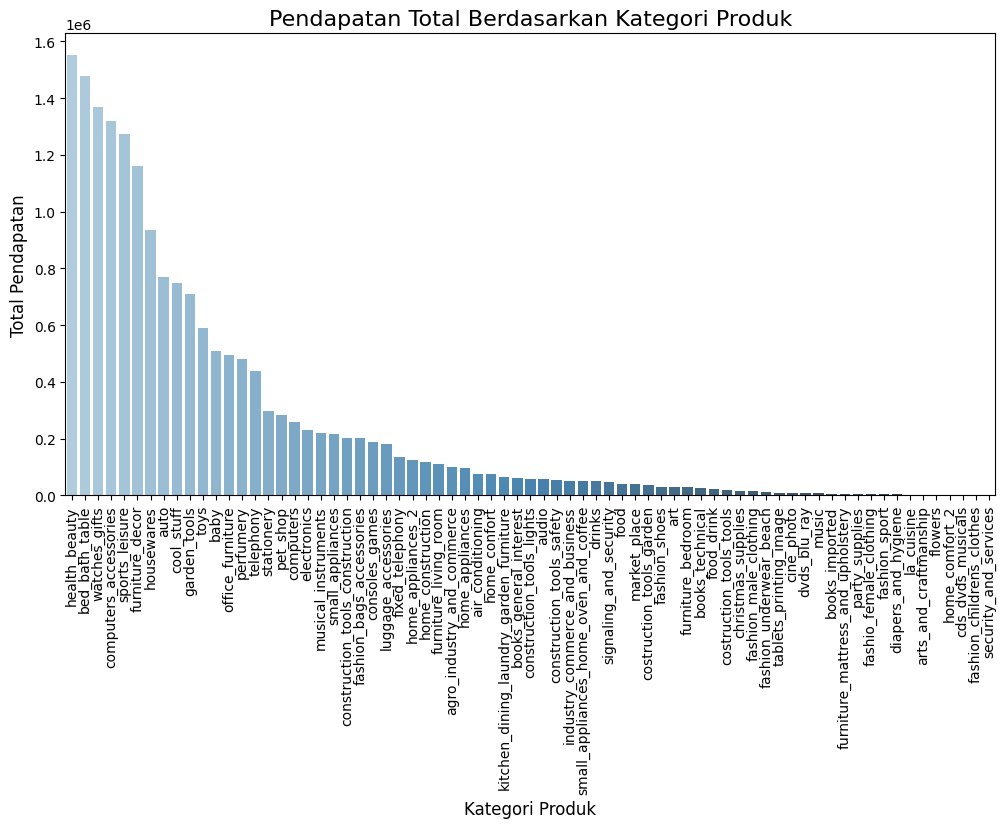

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan product_category_name dan menghitung total penjualan dan pendapatan
category_summary = category_sales.groupby('product_category_name_english').agg({
    'order_item_id': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Sortir berdasarkan total pendapatan
category_summary = category_summary.sort_values(by='total_order_value', ascending=False)

# Membuat bar chart untuk kategori produk berdasarkan total pendapatan
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='total_order_value', data=category_summary, palette='Blues_d')
plt.title('Pendapatan Total Berdasarkan Kategori Produk', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Pendapatan', fontsize=12)
plt.xticks(rotation=90)
plt.show()


<ipython-input-117-3929b10490a6>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




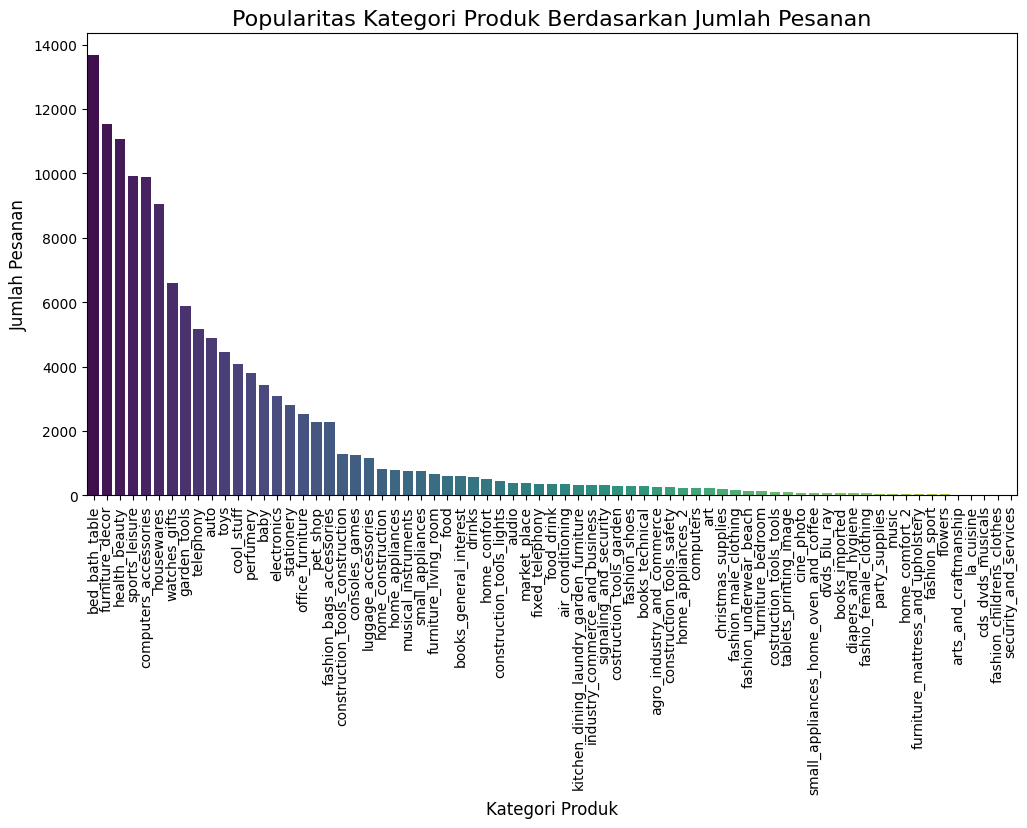

In [117]:
# Membuat bar chart untuk kategori produk berdasarkan jumlah pesanan (popularitas)
category_summary = category_summary.sort_values(by='order_item_id', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='order_item_id', data=category_summary, palette='viridis')
plt.title('Popularitas Kategori Produk Berdasarkan Jumlah Pesanan', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.xticks(rotation=90)
plt.show()


In [118]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Agregasi data
category_performance = category_sales.groupby("product_category_name_english").agg({
    "order_item_id": "sum",
    "total_order_value": "sum",
}).reset_index()

category_performance = category_performance.rename(columns={
    "order_item_id": "items_sold",
    "total_order_value": "total_revenue"
})

# Menambahkan rating rata-rata
category_ratings = category_sales_reviews.groupby("product_category_name_english")["review_score"].mean().reset_index()
category_performance = pd.merge(category_performance, category_ratings, on="product_category_name_english")

# Urutkan berdasarkan total pendapatan
category_performance = category_performance.sort_values("total_revenue", ascending=False)

# Treemap untuk kontribusi pendapatan
fig1 = px.treemap(
    category_performance,
    path=["product_category_name_english"],
    values="total_revenue",
    title="Kontribusi Pendapatan per Kategori Produk",
    color="total_revenue",
    color_continuous_scale="Viridis",
)

fig1.show()

In [119]:
# Bar chart untuk jumlah item terjual dan total pendapatan
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

fig2.add_trace(
    go.Bar(x=category_performance["product_category_name_english"], y=category_performance["items_sold"], name="Items Sold"),
    secondary_y=False,
)

fig2.add_trace(
    go.Scatter(x=category_performance["product_category_name_english"], y=category_performance["total_revenue"], name="Total Revenue", mode="lines+markers"),
    secondary_y=True,
)

fig2.update_layout(
    title_text="Jumlah Item Terjual dan Total Pendapatan per Kategori",
    xaxis_title="Kategori Produk",
    xaxis_tickangle=-45,
)

fig2.update_yaxes(title_text="Jumlah Item Terjual", secondary_y=False)
fig2.update_yaxes(title_text="Total Pendapatan", secondary_y=True)

fig2.show()

**Conclusion**

1. Kategori Paling Populer:

  Berdasarkan Gambar 2 (Popularitas Kategori Produk Berdasarkan Jumlah Pesanan), kategori produk yang paling populer adalah:

  *   Bed, bath, table
  *   Health beauty
  *   Furniture decor
  *   Sports leisure
  *   Housewares

  Kategori-kategori ini memiliki jumlah pesanan tertinggi.


2. Kontribusi Terbesar terhadap Pendapatan:

  Berdasarkan Gambar 1 (Pendapatan Total Berdasarkan Kategori Produk) dan Gambar 4 (Kontribusi Pendapatan per Kategori Produk), kategori yang memberikan kontribusi terbesar terhadap pendapatan adalah:
  *   Health beauty
  *   Bed, bath, table
  *   Watches gifts
  *   Computer accessories
  *   Sports leisure


3. Perbandingan Popularitas vs Pendapatan:

  Gambar 3 menunjukkan perbandingan antara jumlah item terjual (popularitas) dan total pendapatan. Beberapa kategori seperti health beauty, watches gifts, dan sports leisure menunjukkan keselarasan yang baik antara popularitas dan pendapatan. Namun, ada beberapa kategori yang meskipun tidak terlalu populer dalam jumlah pesanan, tetapi memberikan `kontribusi pendapatan yang signifikan`, seperti `watches gifts`.


4. Variasi Harga Produk:
  
  Perbedaan antara peringkat popularitas dan peringkat pendapatan untuk beberapa kategori menunjukkan adanya `variasi harga produk`. Misalnya, `watches gifts mungkin memiliki harga per unit yang lebih tinggi` dibandingkan kategori lain, sehingga memberikan kontribusi `pendapatan yang lebih besar` meskipun jumlah pesanannya lebih rendah.


5. Kategori dengan Performa Rendah:

  Kategori-kategori di bagian bawah grafik, seperti security and services, arts and craftmanship, dan fashion accessories, menunjukkan performa yang relatif rendah baik dalam hal popularitas maupun kontribusi pendapatan.

Kesimpulan:
Performa penjualan bervariasi di antara kategori produk. Kategori seperti `health beauty, bed bath table, dan sports leisure menunjukkan performa yang kuat` baik dalam hal popularitas maupun kontribusi pendapatan. Beberapa `kategori seperti watches gifts menunjukkan nilai transaksi yang tinggi` meskipun jumlah pesanannya lebih rendah. Strategi bisnis mungkin perlu fokus pada `mempertahankan performa kategori-kategori unggulan` ini sambil meningkatkan performa kategori-kategori dengan kontribusi lebih rendah.

### Pertanyaan 3:
Apakah ada korelasi antara harga produk dan rating ulasan yang diberikan? Apakah produk yang lebih mahal cenderung mendapatkan ulasan yang lebih baik?



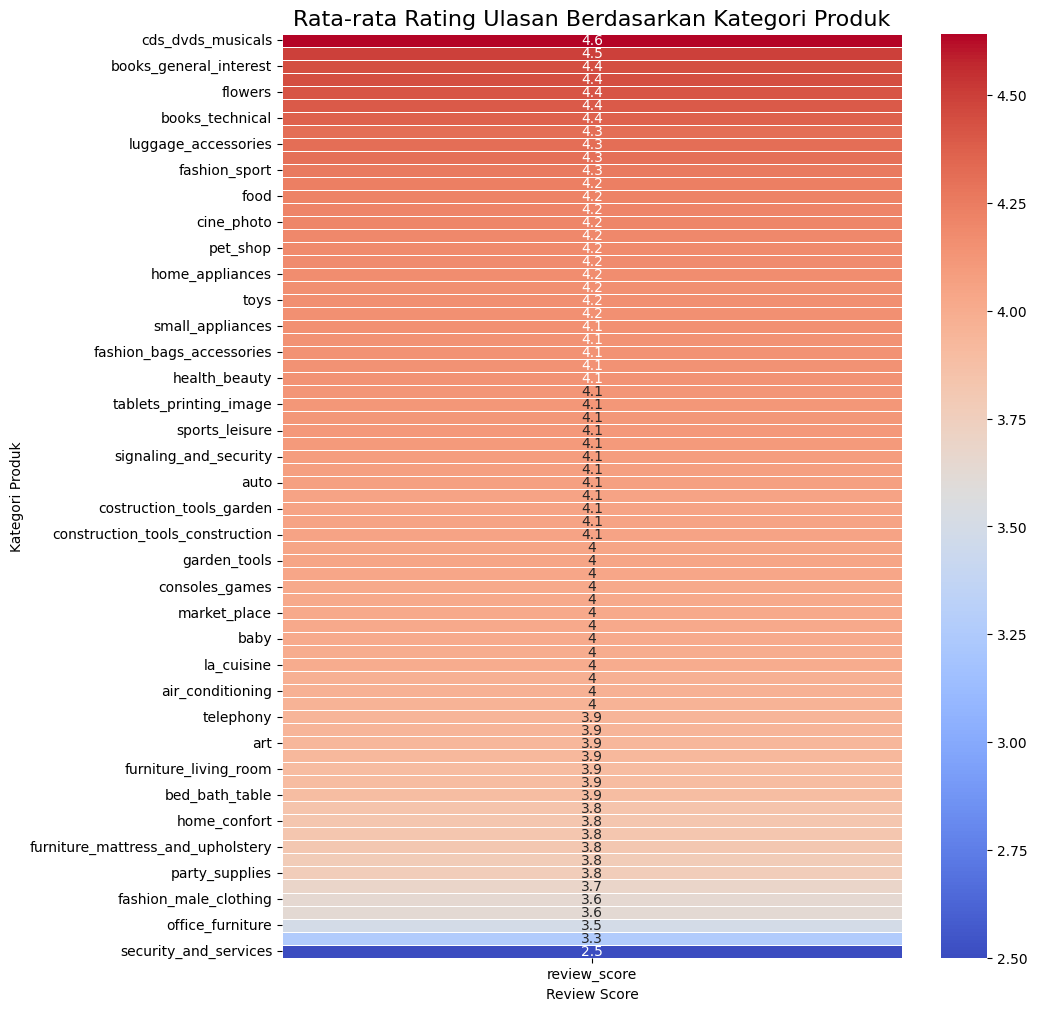

In [120]:
# Membuat pivot table untuk melihat hubungan antara kategori produk dan rata-rata rating ulasan
pivot_table_reviews = category_sales_reviews.pivot_table(
    index='product_category_name_english',
    values='review_score',
    aggfunc='mean'
).sort_values(by='review_score', ascending=False)

# Membuat heatmap dari pivot table
plt.figure(figsize=(10, 12))
sns.heatmap(pivot_table_reviews, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Rata-rata Rating Ulasan Berdasarkan Kategori Produk', fontsize=16)
plt.xlabel('Review Score')
plt.ylabel('Kategori Produk')
plt.show()


In [121]:
# Scatter plot untuk hubungan antara item terjual, pendapatan, dan rating
fig3 = px.scatter(
    category_performance,
    x="items_sold",
    y="total_revenue",
    size="items_sold",
    color="review_score",
    hover_name="product_category_name_english",
    title="Hubungan antara Item Terjual, Pendapatan, dan Rating per Kategori",
    labels={"items_sold": "Jumlah Item Terjual", "total_revenue": "Total Pendapatan", "review_score": "Rating Rata-rata"},
)
fig3.show()

In [122]:
correlation = category_sales_reviews['price'].corr(category_sales_reviews['review_score'])
print(f"Korelasi antara harga produk dan rating ulasan: {correlation}")


Korelasi antara harga produk dan rating ulasan: -0.003940870070211974


In [123]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Scatter plot
fig1 = px.scatter(
    category_sales_reviews,
    x="price",
    y="review_score",
    opacity=0.5,
    title="Hubungan antara Harga Produk dan Rating Ulasan",
    labels={"price": "Harga Produk", "review_score": "Rating Ulasan"},
)

fig1.update_traces(marker=dict(size=5))
fig1.update_layout(
    xaxis_title="Harga Produk",
    yaxis_title="Rating Ulasan",
)

# Menampilkan visualisasi
fig1.show()

**Conclusion**

1. Tidak ada korelasi yang jelas:
  
  Dari Gambar 3 (Hubungan antara Harga Produk dan Rating Ulasan), kita dapat melihat bahwa tidak ada pola yang jelas atau tren linear antara harga produk dan rating ulasan. Titik-titik data tersebar secara merata di seluruh rentang harga dan rating.

2. Konsistensi rating di berbagai tingkat harga:
  
  Rating ulasan yang tinggi (4-5 bintang) dan rendah (1-2 bintang) dapat ditemukan di seluruh spektrum harga, dari produk murah hingga mahal. Ini menunjukkan bahwa kepuasan pelanggan tidak secara langsung terkait dengan harga produk.

3. Konsentrasi rating:

  Sebagian besar rating terkonsentrasi antara 3-5 bintang, terlepas dari harga produk. Ini menunjukkan bahwa secara umum, pelanggan cenderung memberikan rating yang positif atau netral untuk sebagian besar produk.

4. Variasi rating pada produk murah:
  
  Ada sedikit indikasi bahwa produk dengan harga lebih rendah (di bawah 1000) memiliki variasi rating yang lebih besar, mulai dari 1 hingga 5 bintang. Ini mungkin menunjukkan bahwa ekspektasi pelanggan untuk produk murah lebih bervariasi.

5. Konsistensi rating pada produk mahal:
  
  Untuk produk dengan harga lebih tinggi (di atas 3000), rating cenderung lebih konsisten dan terkonsentrasi antara 4-5 bintang. Namun, jumlah data untuk produk mahal ini lebih sedikit, sehingga kesimpulan ini mungkin tidak sepenuhnya representatif.

6. Faktor lain yang mempengaruhi rating:
  
  Dari Gambar 1, kita dapat melihat bahwa kategori produk memiliki pengaruh yang lebih signifikan terhadap rating rata-rata dibandingkan dengan harga. Beberapa kategori seperti CDs/DVDs/musicals dan books_general_interest konsisten mendapatkan rating tinggi, sementara kategori seperti security_and_services mendapatkan rating lebih rendah.

7. Kompleksitas hubungan:
  
  Gambar 2 menunjukkan bahwa hubungan antara jumlah item terjual, total pendapatan, dan rating rata-rata bersifat kompleks dan tidak linear. Beberapa kategori dengan penjualan tinggi tidak selalu memiliki rating tertinggi, dan sebaliknya.

Kesimpulan:
Berdasarkan visualisasi yang diberikan, tidak ada bukti yang kuat untuk menyimpulkan bahwa ada korelasi langsung antara harga produk dan rating ulasan yang diberikan. Produk yang lebih mahal tidak selalu mendapatkan ulasan yang lebih baik. Kepuasan pelanggan, yang tercermin dalam rating ulasan, tampaknya lebih dipengaruhi oleh faktor-faktor lain seperti kualitas produk, kesesuaian dengan ekspektasi pelanggan, dan mungkin juga kategori produk itu sendiri. Harga bukanlah prediktor yang kuat untuk rating ulasan dalam dataset ini.

### Pertanyaan 4:
Apakah metode pembayaran bervariasi berdasarkan wilayah geografis pelanggan? Apakah pelanggan dari daerah tertentu lebih sering memilih pembayaran dengan kartu kredit, transfer bank, atau metode lain?



In [124]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Menghitung persentase untuk setiap metode pembayaran
payment_by_city_percent = payment_by_city.div(payment_by_city.sum(axis=1), axis=0) * 100

# Stacked Bar Chart
fig1 = px.bar(
    payment_by_city_percent.reset_index().melt(id_vars='customer_state', var_name='payment_type', value_name='percentage'),
    x='customer_state',
    y='percentage',
    color='payment_type',
    title='Proporsi Metode Pembayaran per Negara Bagian',
    labels={'customer_state': 'Negara Bagian', 'percentage': 'Persentase', 'payment_type': 'Metode Pembayaran'},
    height=600
)

fig1.update_layout(
    xaxis_title='Negara Bagian',
    yaxis_title='Persentase',
    legend_title='Metode Pembayaran',
    xaxis={'categoryorder':'total descending'}
)
fig1.show()

In [125]:
# Heatmap
fig2 = px.imshow(
    payment_by_city_percent.T,
    title='Persentase Penggunaan Metode Pembayaran per Negara Bagian',
    labels=dict(x='Negara Bagian', y='Metode Pembayaran', color='Persentase'),
    aspect='auto',
    color_continuous_scale='Viridis'
)

fig2.update_layout(
    xaxis_title='Negara Bagian',
    yaxis_title='Metode Pembayaran'
)

fig2.show()

**Conclusion**

1. Variasi metode pembayaran:

  Ada variasi dalam penggunaan metode pembayaran di berbagai wilayah, meskipun perbedaannya tidak terlalu ekstrem. Metode pembayaran yang tersedia di semua wilayah meliputi boleto, credit card, debit card, dan voucher.


2. Dominasi kartu kredit:

  Kartu kredit (credit card) adalah metode pembayaran yang paling dominan di hampir semua wilayah. Penggunaan kartu kredit secara konsisten tinggi, umumnya mencakup 60-80% dari total transaksi di sebagian besar wilayah.


3. Variasi regional:

  Beberapa wilayah menunjukkan pola penggunaan yang sedikit berbeda. Misalnya, AP memiliki penggunaan boleto yang lebih tinggi dibandingkan wilayah lain. Wilayah seperti RO (Rondônia) dan RR (Roraima) menunjukkan penggunaan kartu kredit yang lebih tinggi dibandingkan rata-rata.


3. Metode pembayaran sekunder:

  Boleto muncul sebagai metode pembayaran sekunder yang signifikan di banyak wilayah, dengan penggunaan bervariasi antara 10-30% dari total transaksi. Penggunaan kartu debit dan voucher umumnya lebih rendah dan konsisten di seluruh wilayah.


4. Preferensi regional:

  Meskipun kartu kredit dominan di mana-mana, ada indikasi preferensi regional untuk metode pembayaran tertentu. Misalnya, beberapa wilayah menunjukkan penggunaan boleto yang lebih tinggi.


5. Konsistensi umum:

  Secara keseluruhan, pola penggunaan metode pembayaran relatif konsisten di sebagian besar wilayah, dengan variasi kecil yang mencerminkan preferensi atau infrastruktur lokal.


Kesimpulan: Meskipun ada variasi dalam penggunaan metode pembayaran di berbagai wilayah geografis, kartu kredit tetap menjadi pilihan dominan di hampir semua area. Variasi regional memang ada, terutama dalam penggunaan metode sekunder seperti boleto, namun perbedaannya tidak terlalu drastis. Faktor-faktor seperti infrastruktur keuangan lokal, kebiasaan konsumen, dan mungkin kebijakan regional dapat mempengaruhi preferensi metode pembayaran di wilayah-wilayah tertentu.

### Pertanyaan 5:
Apakah penjual dari wilayah tertentu memiliki kinerja pengiriman yang lebih baik dibandingkan dengan penjual dari wilayah lain? Misalnya, apakah penjual dari kota besar lebih cepat dalam mengirimkan pesanan dibandingkan penjual dari daerah pedesaan?

In [126]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Choropleth Map
delivery_per_state = order_with_seller.pivot_table(
    index='seller_state',
    values='delivery_time',
    aggfunc='mean'
).reset_index()

# Mapping seller_state ke geojson properties ('sigla' untuk kode negara bagian Brazil)
delivery_per_state['seller_state'] = delivery_per_state['seller_state'].apply(lambda x: x.upper())

fig1 = px.choropleth(
    delivery_per_state,
    locations='seller_state',
    featureidkey="properties.sigla",  # Kunci untuk mencocokkan kode negara bagian di GeoJSON
    color='delivery_time',
    hover_name='seller_state',
    hover_data='delivery_time',
    geojson=brazil_states_geojson,
    scope="south america",
    color_continuous_scale="Viridis_r",
    labels={'delivery_time':'Waktu Pengiriman Rata-rata (hari)'},
    title='Waktu Pengiriman Rata-rata per Negara Bagian'
)

# Update layout untuk peta
fig1.update_geos(fitbounds="locations", visible=False)
fig1.update_layout(
    title_text='Rata-rata Waktu Pengiriman Berdasarkan State',
    geo=dict(
        scope='south america',
        projection_type='mercator'
    ),
    width=1200,
    height=800
)

fig1.show()

In [127]:
# Bar Chart
fig2 = make_subplots(rows=1, cols=2, subplot_titles=("10 Kota Tercepat", "10 Kota Terlambat"))

fig2.add_trace(
    go.Bar(x=fastest_delivery_cities['seller_city'], y=fastest_delivery_cities['delivery_time'],
           name="Tercepat", marker_color='green'),
    row=1, col=1
)

fig2.add_trace(
    go.Bar(x=slowest_delivery_cities['seller_city'], y=slowest_delivery_cities['delivery_time'],
           name="Terlambat", marker_color='red'),
    row=1, col=2
)

fig2.update_layout(height=500, title_text="Perbandingan Waktu Pengiriman Kota Tercepat dan Terlambat (dalam Hari)")
fig2.update_xaxes(tickangle=45)


fig2.show()

**Conclusion**

1. Variasi kinerja pengiriman antar wilayah:

  Warna ungu tua di bagian barat laut menunjukkan waktu pengiriman yang paling lama (sekitar 45 hari), sementara warna kuning di sebagian besar wilayah menunjukkan waktu pengiriman yang lebih cepat (sekitar 15-20 hari).


2. Perbedaan signifikan antara kota tercepat dan terlambat:

  Kota tercepat memiliki waktu pengiriman rata-rata 2-4 hari.
  Kota terlambat memiliki waktu pengiriman jauh lebih lama, berkisar dari 27 hingga 67 hari.


3. Tidak ada korelasi langsung antara ukuran kota dan kecepatan pengiriman:

  Meskipun beberapa kota besar memiliki kinerja pengiriman yang baik, ada juga kota-kota kecil yang masuk dalam daftar pengiriman tercepat (seperti Cruzimhais).


Kesimpulan:
Berdasarkan data yang ditampilkan, tidak dapat disimpulkan secara mutlak bahwa penjual dari kota besar selalu memiliki kinerja pengiriman yang lebih baik dibandingkan penjual dari daerah pedesaan. Meskipun beberapa kota besar memang menunjukkan kinerja pengiriman yang baik, faktor geografis dan infrastruktur regional tampaknya memainkan peran yang lebih signifikan dalam menentukan kecepatan pengiriman.
Wilayah di Brazil memiliki variasi yang signifikan dalam waktu pengiriman, dengan area selatan dan tenggara umumnya menunjukkan kinerja yang lebih baik. Faktor-faktor seperti infrastruktur transportasi, jarak dari pusat distribusi, dan mungkin kebijakan logistik regional kemungkinan besar mempengaruhi waktu pengiriman lebih dari sekadar ukuran kota.
Untuk mendapatkan pemahaman yang lebih komprehensif, diperlukan analisis lebih lanjut terhadap faktor-faktor seperti infrastruktur transportasi, volume penjualan, dan kebijakan logistik di masing-masing wilayah dan kota.

## Analisis Lanjutan

In [128]:
all_df = pd.merge(
    left=orders_customers_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_time  approval_time  ...  \
0                    2017-10-18            8.0            0.0  ...   
1                    2018-08-13           14.0            1.0  ...   
2                    2018-09-04            9.0            0.0  ...   
3                    2017-12-15           13.0            0.0  ...   
4                    2018-02-26            3.0            0.0  ...   

   customer_zip_code_prefix            customer_city  customer_state  \
0                      3149                sao paulo              SP   
1                     47813                barreiras              BA   
2                     75265               vianopolis              GO   
3                     59296  sao goncalo do amarante              RN   
4                      9195              santo andre              SP   

  order_item_id                        product_id  \
0           1.0  87285b34884572647811a353c7ac498a   
1           1.0  595fac2a385ac33a80bd5114aec74eb8   
2           1.0  aa4383b373c6aca5d8797843e5594415   
3           1.0  d0b61bfb1de832b15ba9d266ca96e5b0   
4           1.0  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id shipping_limit_date   price freight_value  \
0  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15   29.99          8.72   
1  289cdb325fb7e7f891c38608bf9e0962 2018-07-30 03:24:27  118.70         22.76   
2  4869f7a5dfa277a7dca6462dcf3b52b2 2018-08-13 08:55:23  159.90         19.22   
3  66922902710d126a0e7d26b0e3805106 2017-11-23 19:45:59   45.00         27.20   
4  2c9e548be18521d1c43cde1c582c6de8 2018-02-19 20:31:37   19.90          8.72   

   total_order_value  
0              38.71  
1             141.46  
2             179.12  
3              72.20  
4              28.62  

[5 rows x 22 columns]

In [129]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_order_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

customer_unique_id max_order_timestamp  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27          1     27.19
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41          1     43.62
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42          1    196.89

In [131]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

customer_unique_id  frequency  monetary  recency
0  0000366f3b9a7992bf8c76cfdf3221e2          1    141.90      160
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1     27.19      163
2  0000f46a3911fa3c0805444483337064          1     86.22      586
3  0000f6ccb0745a6a4b88665a16c9f078          1     43.62      370
4  0004aac84e0df4da2b147fca70cf8255          1    196.89      337

In [133]:
rfm_df.describe()

frequency      monetary       recency
count  96096.000000  96096.000000  96096.000000
mean       1.034809    187.919012    288.108797
std        0.214384    401.994490    153.417869
min        1.000000      0.000000      0.000000
25%        1.000000     63.000000    164.000000
50%        1.000000    110.960000    269.000000
75%        1.000000    194.380000    397.000000
max       17.000000  61488.360000    773.000000

In [134]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

customer_unique_id  frequency  monetary  recency
50975  87ab9fec999db8bd5774917de3cdf01c          1      0.00        0
14363  262e1f1e26e92e86375f86840b4ffd63          2    222.03        1
65954  af5454198a97379394cacf676e1e96cb          3    197.55       14
37382  634420a0ea42302205032ed44ac7fccc          2     80.38       16
58524  9bb92bebd4cb7511e1a02d5e50bc4655          1      0.00       18

In [135]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

customer_unique_id  frequency  monetary  recency
52973  8d50f5eadf50201ccdcedfb9e2ac8455         17    902.04       58
23472  3e43e6105506432c953e165fb2acf44c          9   1506.37      232
37797  6469f99c1f9dfae7733b25662e7f1782          7    824.04      111
76082  ca77025e7201e3b30c44b472ff346268          7   1624.58      138
10354  1b6c7548a2a1f9037c1fd3ddfed95f33          7   1197.93      245

<ipython-input-136-2d23a75560f4>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-136-2d23a75560f4>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-136-2d23a75560f4>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




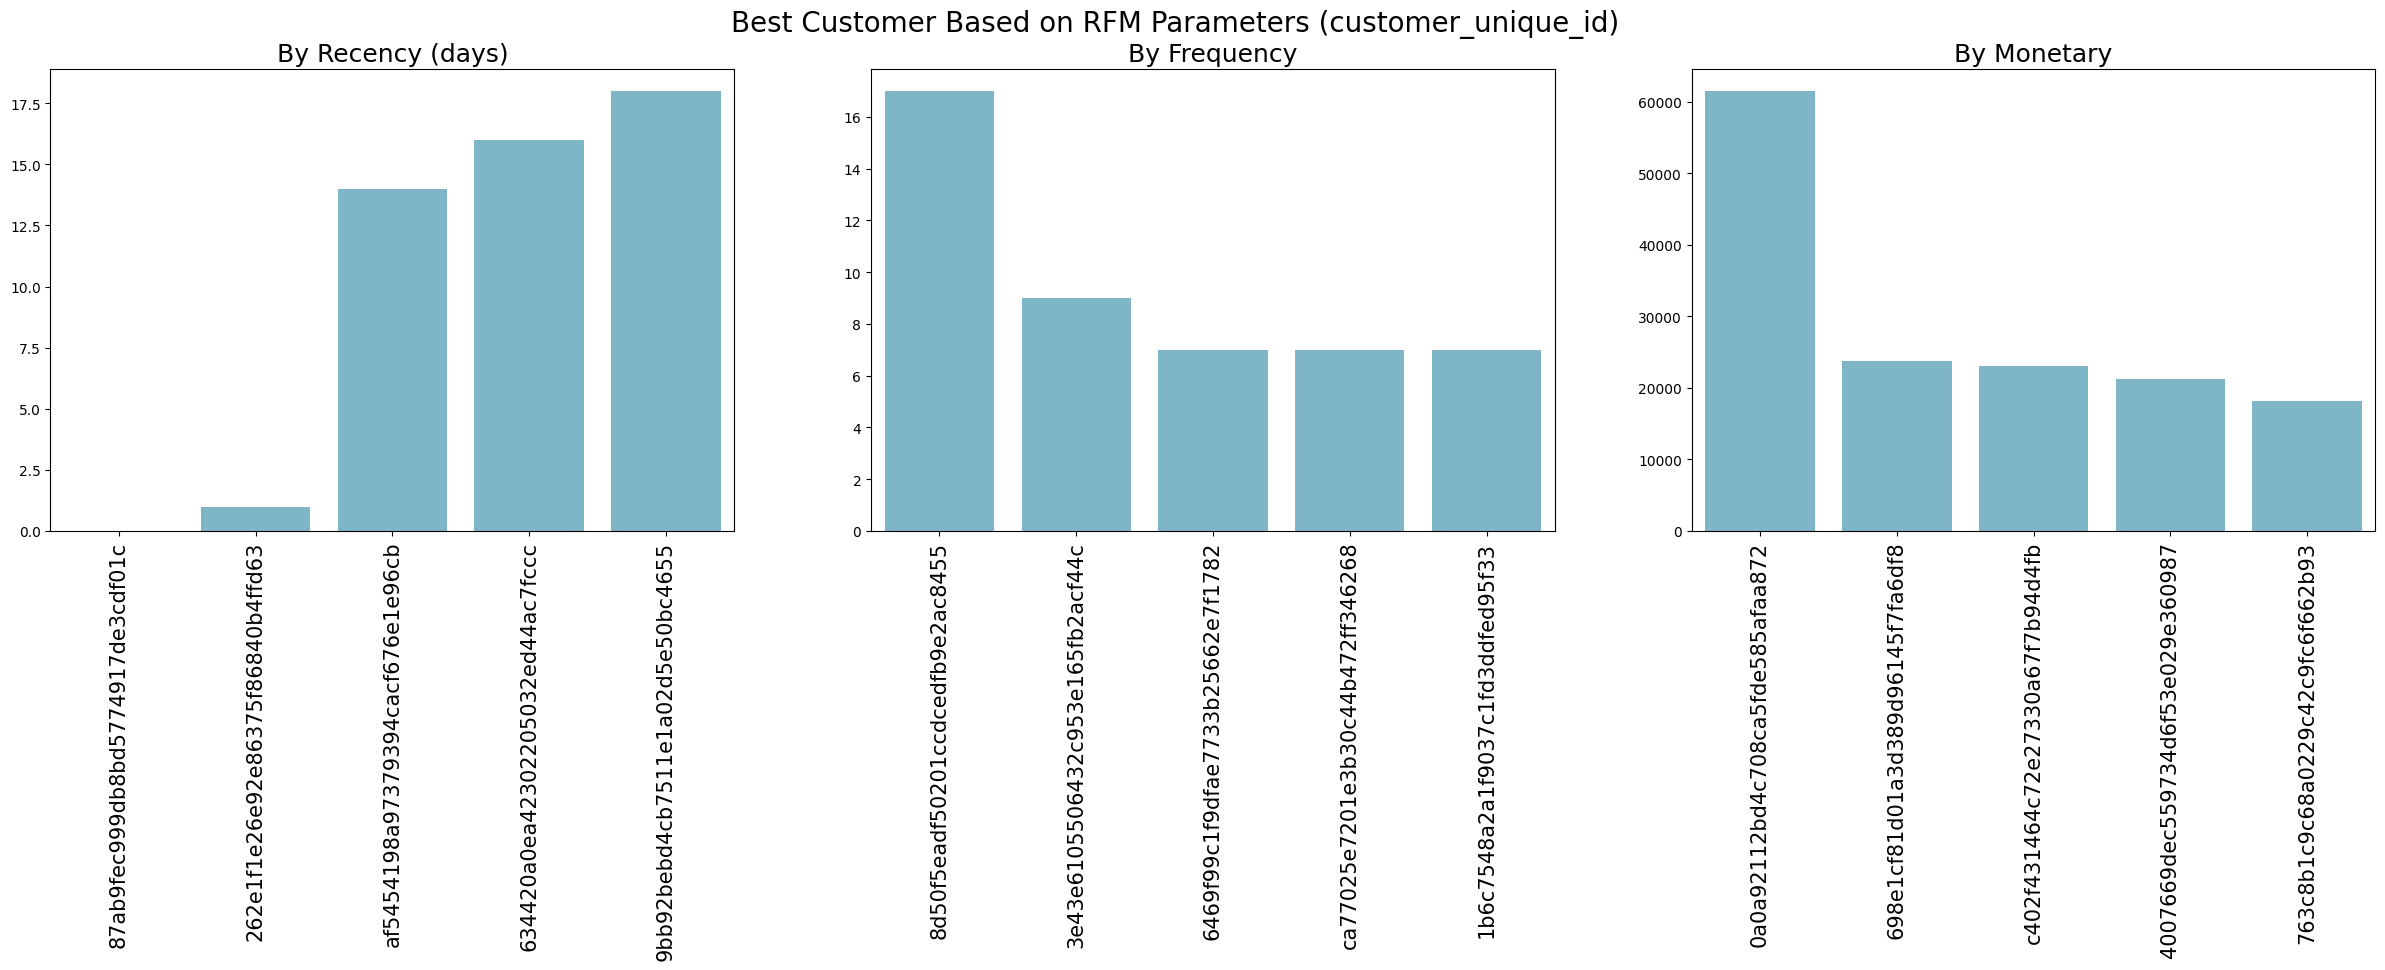

In [136]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=90)  # Rotating the x-labels vertically

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)  # Rotating the x-labels vertically

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)  # Rotating the x-labels vertically

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()
